In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# So I tried mounting drive and importing the data from it but it doesn't work
# Instead go download the data from the team data folder and just upload it here

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/Socrano/ACTU-Project/main/data.csv")
df.head(20)
# Probable maximum loss (PML) is the maximum loss that an insurer would be expected to incur on a policy.
# Maybe we should ask Carlos how the PML in the data is calculated

Unnamed: 0 property_type  claim_id  claim_amount  property_value  \
0            1         house  723949d8      196740.0        528000.0   
1            2         house  90d02e95      187650.0        533000.0   
2            3         house  344c54d1      206580.0        366000.0   
3            4         house  b3968015      201550.0        234000.0   
4            5         house  b0e31207      205740.0        411000.0   
5            6         house  f66d1e60      207780.0        278000.0   
6            7         house  87281d6e      191240.0        323000.0   
7            8         house  c9c8da94      195140.0        537000.0   
8            9         house  01b15438      214540.0        430000.0   
9           10         house  09e6ef2d      197940.0        385000.0   
10          11         house  2b61e801      233370.0        381000.0   
11          12         house  00b1d3cc      213590.0         97000.0   
12          13         house  0a135cc6      189200.0        393000.0   
13          14         house  2f3325e5      214470.0        521000.0   
14          15         house  8ce48a01      193040.0        544000.0   
15          16         house  2f4d70c7      195090.0        623000.0   
16          17         house  0b3aad44      218310.0        515000.0   
17          18         house  d842a4aa      196040.0        198000.0   
18          19         house  a4749bff      210580.0        361000.0   
19          20         house  1357a5af      224720.0        609000.0   

         pml  deductible         claim_status  payment incident_date  \
0   106000.0      5000.0              settled   191740    2007-07-02   
1   107000.0      1000.0                 open    20000    2011-04-03   
2    73000.0      2000.0              settled   204580    2019-01-12   
3    47000.0      5000.0  under investigation        0    2005-08-17   
4    82000.0       500.0              settled   205240    2023-05-21   
5    56000.0      5000.0              settled   202780    2016-12-16   
6    65000.0      5000.0              settled   186240    2022-09-11   
7   107000.0      2000.0              settled   193140    2022-10-02   
8    86000.0      1000.0                 open    20000    2015-12-07   
9    77000.0      2000.0              settled   195940    2023-10-01   
10   76000.0      5000.0              settled   228370    2018-07-11   
11   19000.0       500.0              settled   213090    2015-09-08   
12   79000.0      2000.0  under investigation        0    2022-06-04   
13  104000.0      1000.0              settled   213470    2011-11-12   
14  109000.0      2000.0              settled   191040    2012-05-08   
15  125000.0      1000.0              settled   194090    2023-12-22   
16  103000.0      1000.0               denied        0    2009-04-30   
17   40000.0      2000.0                 open    20000    2005-12-04   
18   72000.0       500.0              settled   210080    2013-01-01   
19  122000.0      1000.0              settled   223720    2008-12-10   

   payment_date incident_type  
0    2007-09-30  water damage  
1    2011-07-02         theft  
2    2019-04-12       nat cat  
3           NaN       nat cat  
4    2023-08-19          fire  
5    2017-03-16         other  
6    2022-12-10       nat cat  
7    2022-12-31          fire  
8    2016-03-06         theft  
9    2023-12-30          fire  
10   2018-10-09  water damage  
11   2015-12-07         other  
12          NaN  water damage  
13   2012-02-10  water damage  
14   2012-08-06          fire  
15   2024-03-21  water damage  
16          NaN  water damage  
17   2006-03-04         theft  
18   2013-04-01          fire  
19   2009-03-10  water damage

In [3]:
def describe_min_values(data):
    """
    Describe the DataFrame by getting the minimum value for numeric columns.
    """
    # Select only numeric columns
    numeric_cols = data.select_dtypes(include='number')

    # Get the minimum values for numeric columns
    min_values = numeric_cols.min()

    return min_values

describe_min_values(df)

Unnamed: 0             1.0
claim_amount       25900.0
property_value   -338000.0
pml              -338000.0
deductible           250.0
payment                0.0
dtype: float64

In [4]:
df.dtypes

Unnamed: 0          int64
property_type      object
claim_id           object
claim_amount      float64
property_value    float64
pml               float64
deductible        float64
claim_status       object
payment             int64
incident_date      object
payment_date       object
incident_type      object
dtype: object

In [5]:
df['incident_date'] = pd.to_datetime(df['incident_date']).dt.normalize()
df['payment_date'] = pd.to_datetime(df['payment_date']).dt.normalize()

In [6]:
# Get rid of cases where property_value and pml is less than 0

df = df.loc[(df['property_value'] > 0) & (df['pml'] > 0)]


In [7]:
df.describe().T

count                           mean                  min  \
Unnamed: 0      19926.0                    9996.798203                  1.0   
claim_amount    19926.0                   386341.00823              25900.0   
property_value  19926.0                  644369.025394               1000.0   
pml             19926.0                  173730.663455               1000.0   
deductible      19926.0                    4804.614574                250.0   
payment         19926.0                  265993.957141                  0.0   
incident_date     19926  2015-02-18 10:51:25.094850560  2004-01-01 00:00:00   
payment_date      15895  2015-05-19 01:50:47.826360576  2004-03-31 00:00:00   

                                25%                  50%                  75%  \
Unnamed: 0                  4989.25               9979.5             14975.75   
claim_amount               189172.5             201900.0             218380.0   
property_value             323000.0             435000.0             554000.0   
pml                         66000.0              88000.0             112000.0   
deductible                   1000.0               2000.0               5000.0   
payment                     20000.0             188805.0             207500.0   
incident_date   2009-11-09 00:00:00  2015-10-14 12:00:00  2020-07-26 18:00:00   
payment_date    2010-01-27 00:00:00  2016-01-12 00:00:00  2020-11-06 12:00:00   

                                max             std  
Unnamed: 0                  20065.0     5786.746472  
claim_amount            217196400.0  2701835.010975  
property_value           16359000.0  1428997.022824  
pml                      16359000.0   425919.774375  
deductible                 818000.0    24687.385344  
payment                 217186400.0  2289838.254501  
incident_date   2023-12-31 00:00:00             NaN  
payment_date    2024-03-30 00:00:00             NaN

In [8]:
# See the categorical variables
categorical_levels = {col: df[col].unique() for col in df.select_dtypes(include=['object', 'category']).columns}
categorical_levels

{'property_type': array(['house', 'apartment', 'townhouse', 'shop', 'department store',
        'factory', 'warehouse', 'sedan', 'SUV', 'sports car',
        'marine cargo', 'turboprop aircraft', 'light sport aircraft'],
       dtype=object),
 'claim_id': array(['723949d8', '90d02e95', '344c54d1', ..., 'fd91e632', '520e9d3f',
        '5558b0fb'], dtype=object),
 'claim_status': array(['settled', 'open', 'under investigation', 'denied'], dtype=object),
 'incident_type': array(['water damage', 'theft', 'nat cat', 'fire', 'other', 'collision'],
       dtype=object)}

In [9]:
# See the missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Unnamed: 0           0
property_type        0
claim_id             0
claim_amount         0
property_value       0
pml                  0
deductible           0
claim_status         0
payment              0
incident_date        0
payment_date      4031
incident_type        0
dtype: int64


In [10]:
# Look at the levels of the categorical valriables
df_temp1=df.copy()
df_temp2 = {
    'property_type': ['house', 'apartment', 'house', 'townhouse', 'shop', 'factory', 'apartment', 'SUV', 'SUV', 'sports car', 'marine cargo', 'turboprop aircraft', 'light sport aircraft'],
    'claim_status': ['settled', 'open', 'under investigation', 'denied', 'open', 'settled', 'under investigation', 'denied', 'settled', 'settled', 'open', 'denied', 'settled'],
    'incident_type': ['water damage', 'theft', 'nat cat', 'fire', 'other', 'collision', 'theft', 'fire', 'nat cat', 'collision', 'water damage', 'fire', 'other']
}
df_temp1 = pd.DataFrame(df_temp2)
property_type_counts = df['property_type'].value_counts().reset_index()
property_type_counts.columns = ['property_type', 'count']

claim_status_counts = df['claim_status'].value_counts().reset_index()
claim_status_counts.columns = ['claim_status', 'count']

incident_type_counts = df['incident_type'].value_counts().reset_index()
incident_type_counts.columns = ['incident_type', 'count']

print("Property Type Counts:")
#print_horizontal_line()
print(property_type_counts)
#print_horizontal_line()

print("\nClaim Status Counts:")
#print_horizontal_line()
print(claim_status_counts)
#print_horizontal_line()

print("\nIncident Type Counts:")
#print_horizontal_line()
print(incident_type_counts)
#print_horizontal_line()


Property Type Counts:
           property_type  count
0                  house  14657
1       department store   1466
2              apartment   1389
3              townhouse    734
4             sports car    734
5                   shop    294
6                    SUV    147
7           marine cargo    147
8                factory    132
9                  sedan     79
10  light sport aircraft     73
11    turboprop aircraft     59
12             warehouse     15

Claim Status Counts:
          claim_status  count
0              settled  13878
1  under investigation   3021
2                 open   2017
3               denied   1010

Incident Type Counts:
  incident_type  count
0          fire   6835
1  water damage   5022
2       nat cat   3514
3         theft   1994
4         other   1679
5     collision    882


In [11]:
# get ride of cases where the claim_status is under investigation

df_clean = df.loc[df['claim_status'] != 'under investigation']
df_clean = df_clean.drop(df.columns[0], axis=1)
df_clean = df_clean.drop(df.columns[2], axis=1)

In [12]:
conditions = [
    df_clean['property_type'].isin(['house', 'apartment', 'townhouse']),
    df_clean['property_type'].isin(['shop', 'department store', 'factory', 'warehouse']),
    df_clean['property_type'].isin(['sedan', 'SUV', 'sports car']),
    df_clean['property_type'] == 'marine cargo',
    df_clean['property_type'].isin(['turboprop aircraft', 'light sport aircraft'])
]

categories = ['residential', 'commercial', 'auto', 'marine cargo', 'aircraft']

df_clean['category'] = np.select(conditions, categories, default='other')

# Exploratory Data Analysis

In [13]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=10)
    sorted_order = data[feature].value_counts().index[:n]

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=sorted_order,
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

<ipython-input-13-e560af6e5184>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


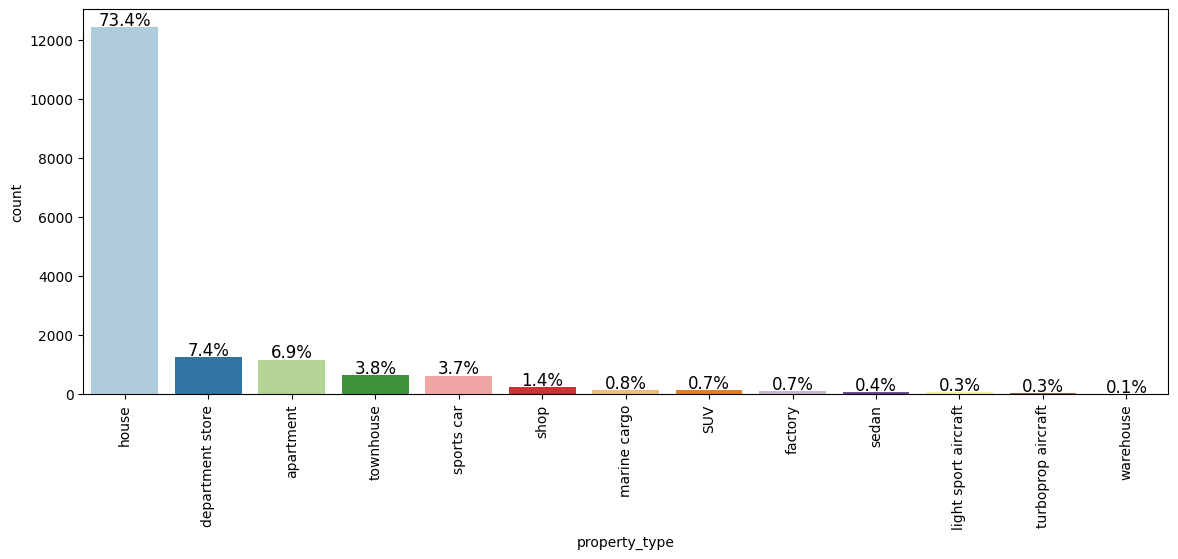

<ipython-input-13-e560af6e5184>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


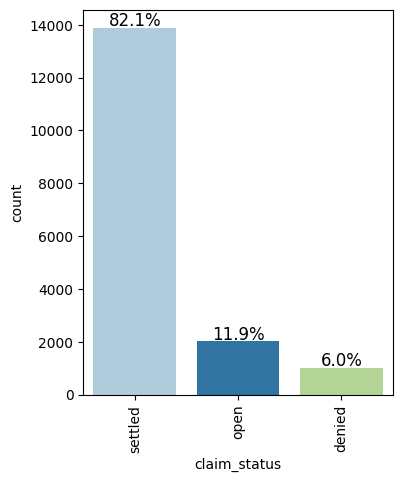

<ipython-input-13-e560af6e5184>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


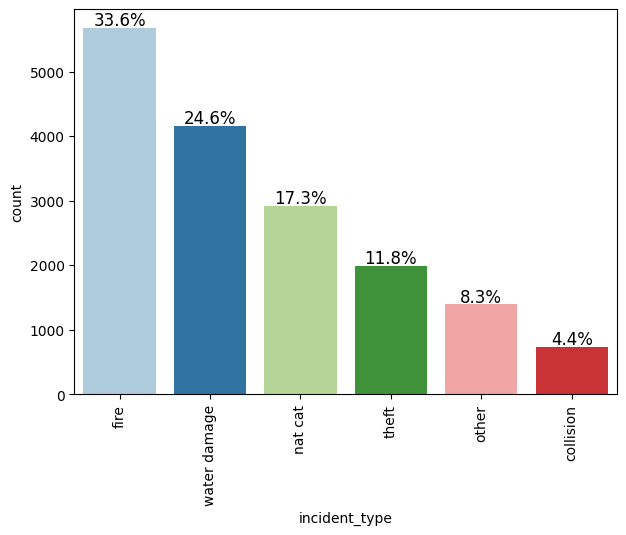

<ipython-input-13-e560af6e5184>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


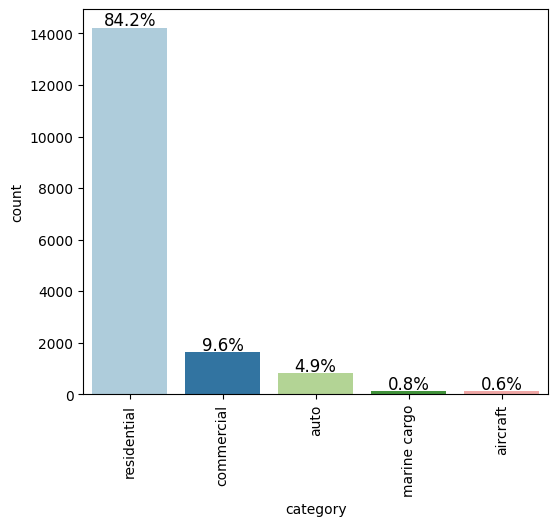

In [14]:
# Bar plot for property type
categorical_columns = {col: df_clean[col].unique() for col in df_clean.select_dtypes(include=['object', 'category']).columns}.keys()
for i in categorical_columns:
  labeled_barplot(data = df_clean, feature = i, perc = True)


In [15]:
# Function for plotting a combination of boxplot and a histogram
def histogram_boxplot(i, j, data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color= "violet"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette= "winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )
    title = "Ditribution for " + i + " under property " + j
    f2.suptitle(title, fontsize=16)

In [16]:
df_clean.head()

property_type  claim_amount  property_value       pml  deductible  \
0         house      196740.0        528000.0  106000.0      5000.0   
1         house      187650.0        533000.0  107000.0      1000.0   
2         house      206580.0        366000.0   73000.0      2000.0   
4         house      205740.0        411000.0   82000.0       500.0   
5         house      207780.0        278000.0   56000.0      5000.0   

  claim_status  payment incident_date payment_date incident_type     category  
0      settled   191740    2007-07-02   2007-09-30  water damage  residential  
1         open    20000    2011-04-03   2011-07-02         theft  residential  
2      settled   204580    2019-01-12   2019-04-12       nat cat  residential  
4      settled   205240    2023-05-21   2023-08-19          fire  residential  
5      settled   202780    2016-12-16   2017-03-16         other  residential

<ipython-input-15-7e3957fb0bc6>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f2, (ax_box2, ax_hist2) = plt.subplots(


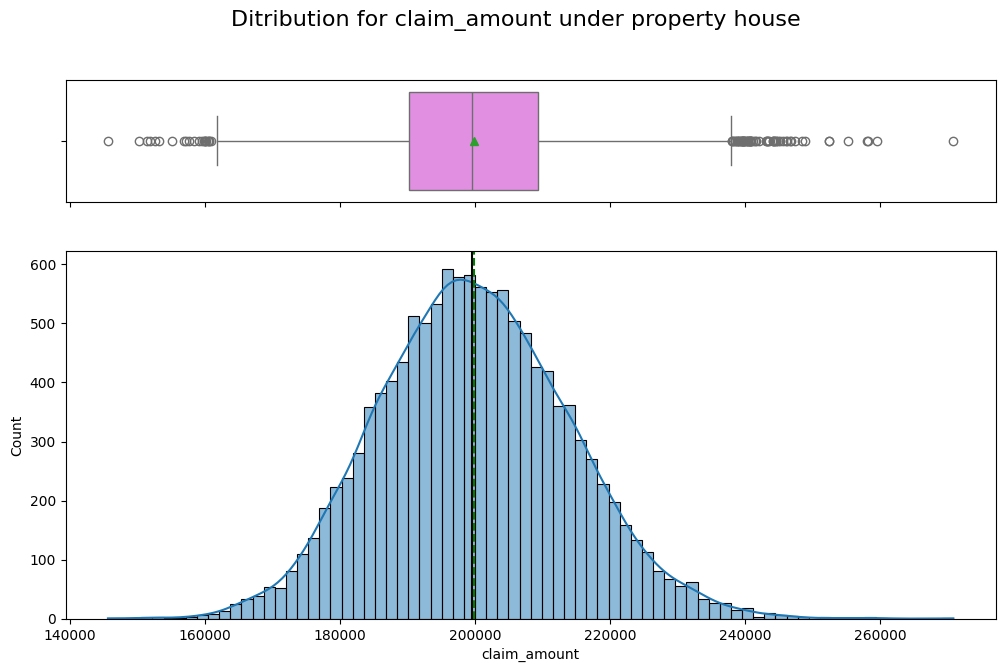

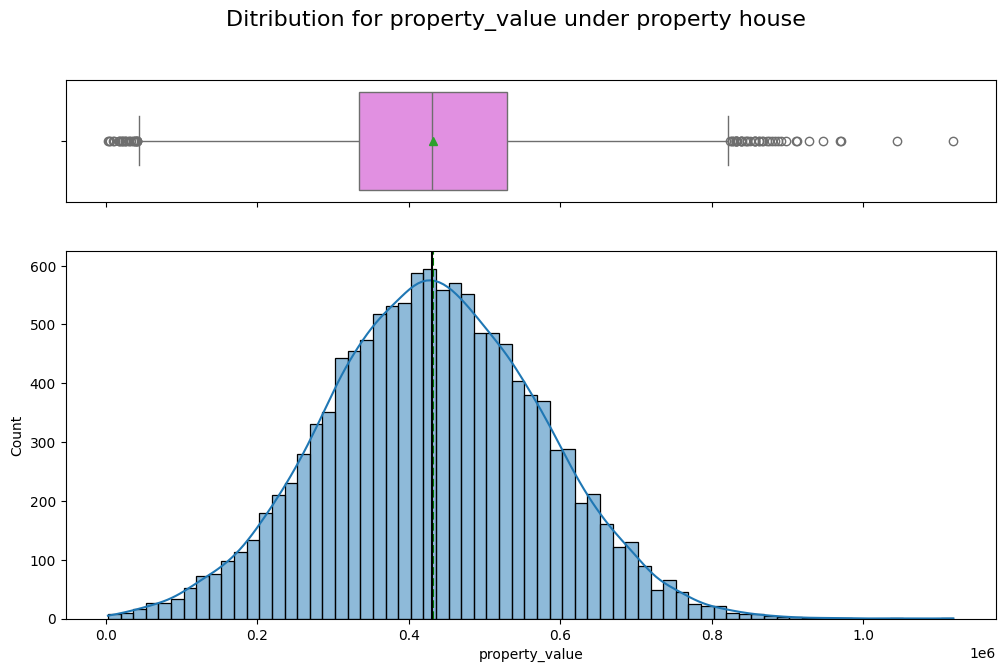

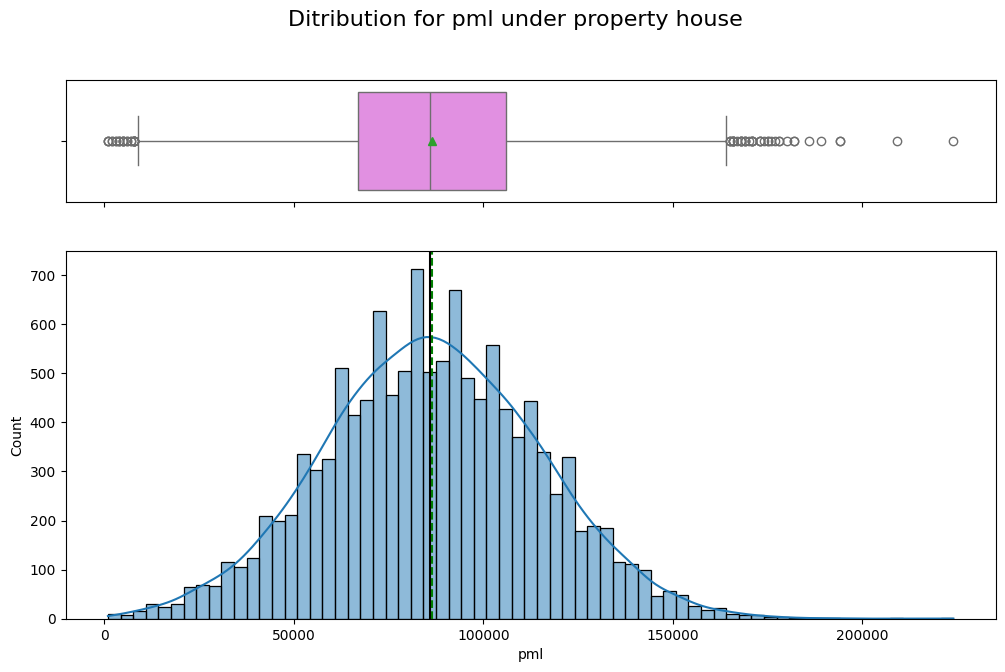

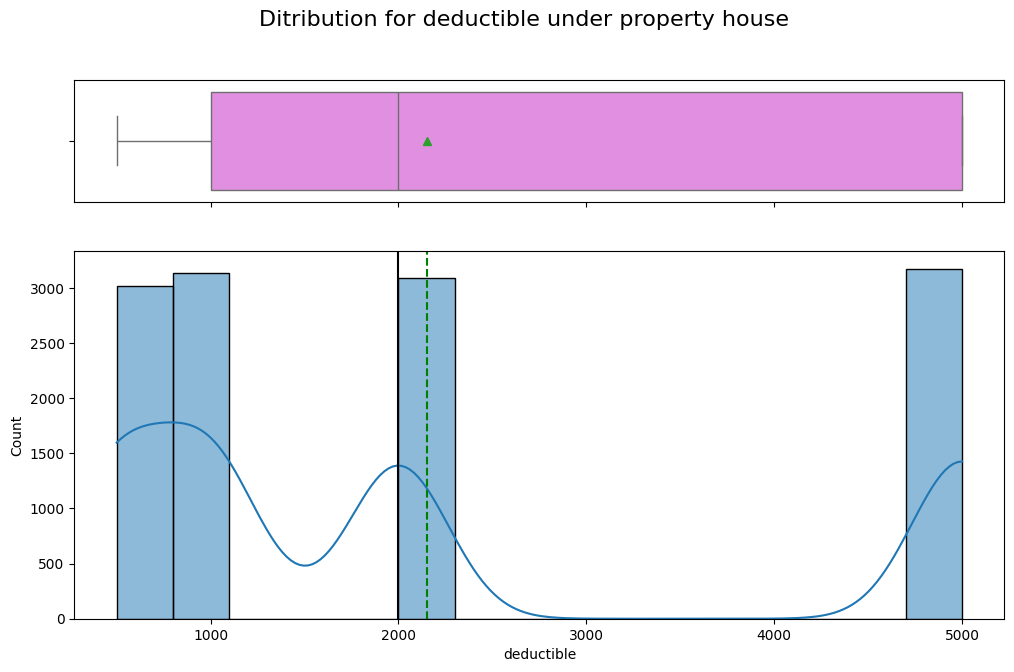

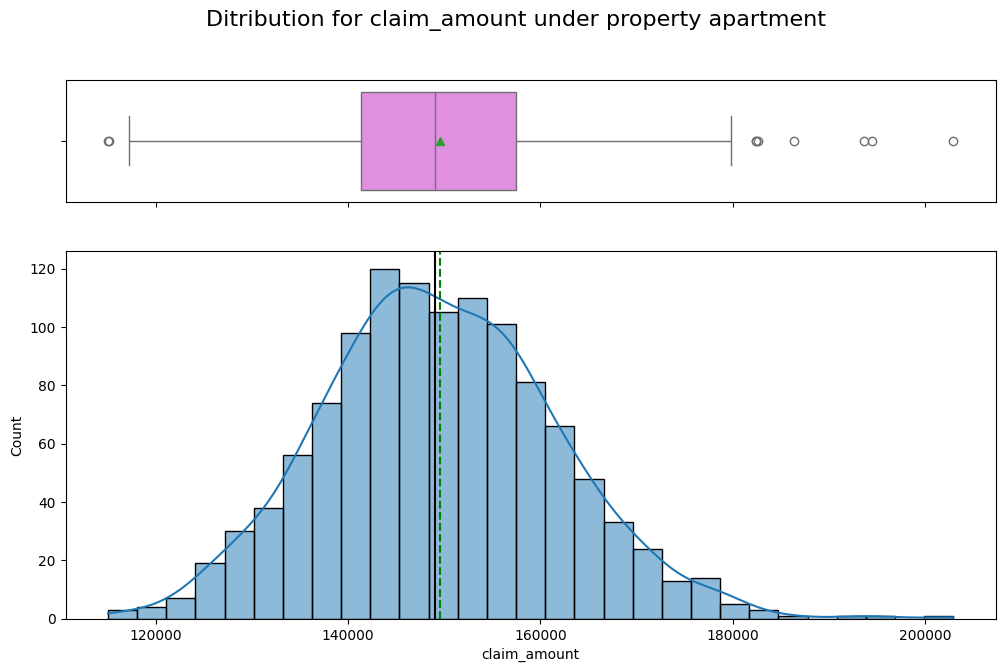

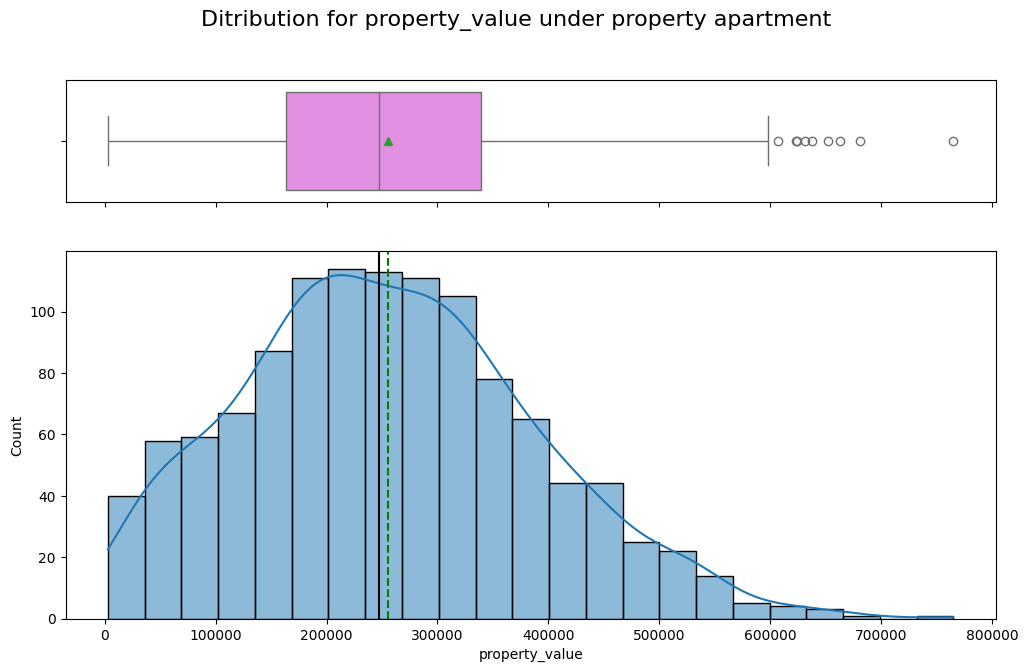

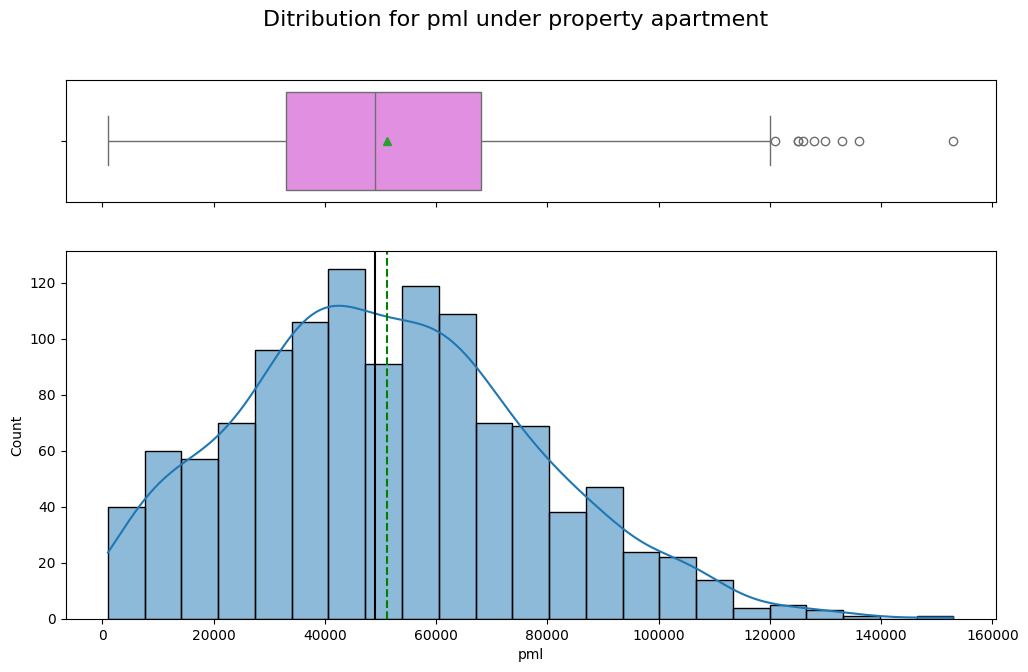

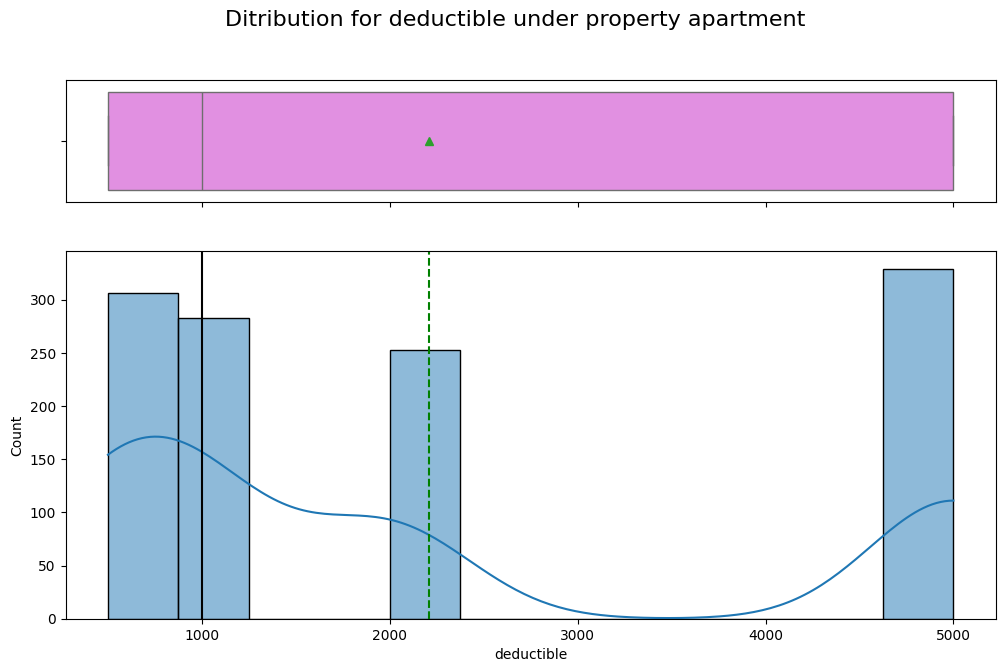

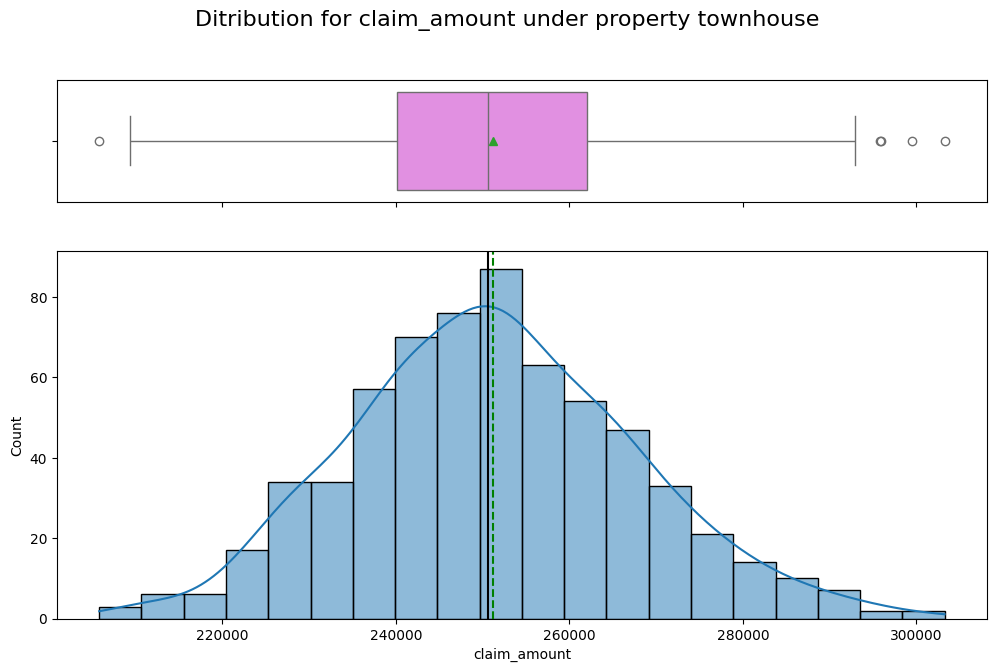

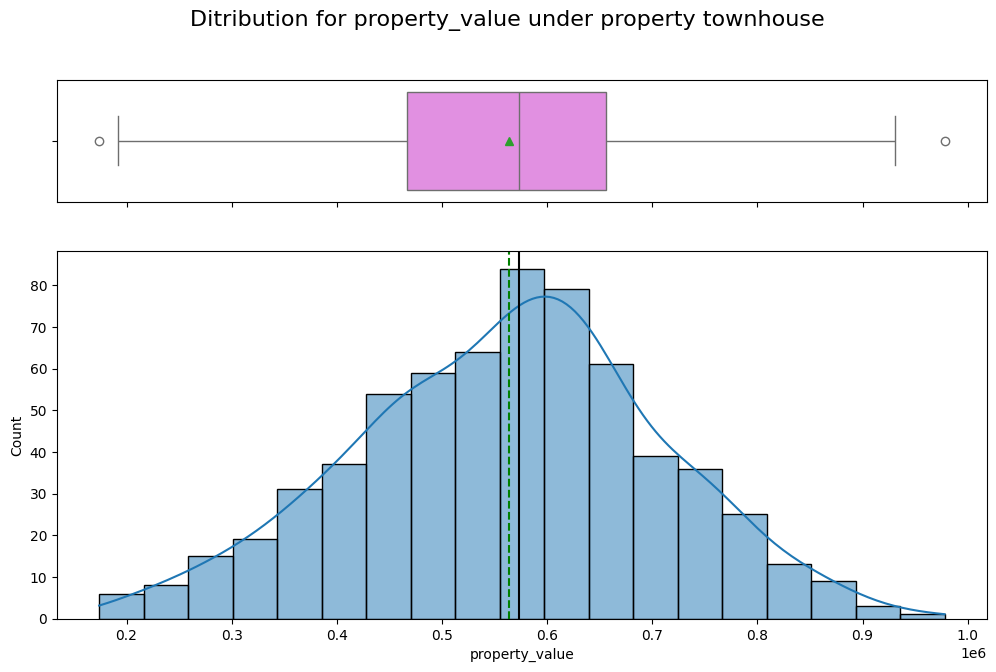

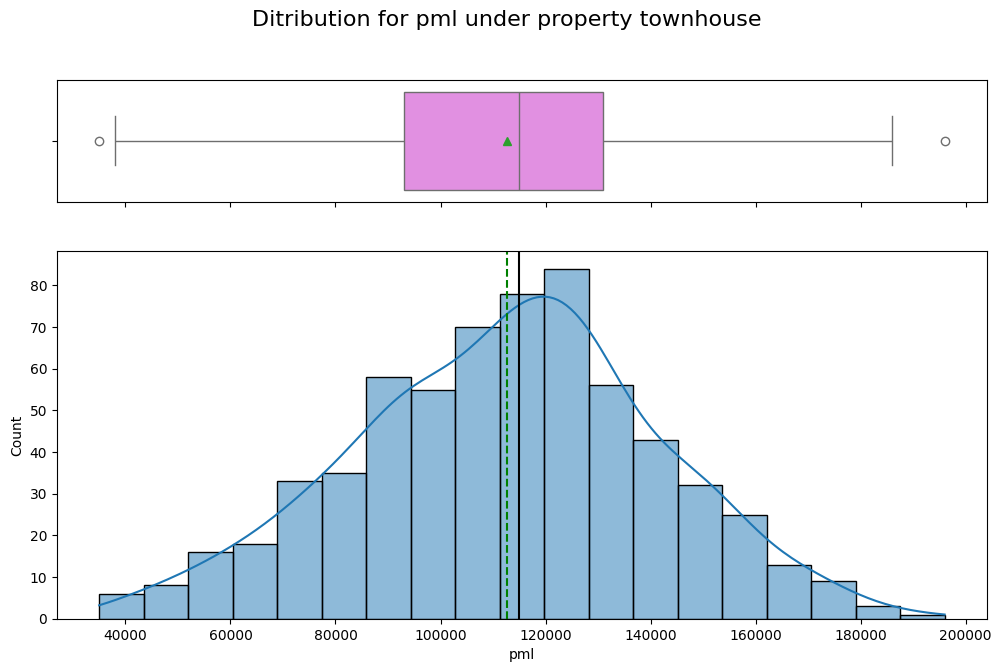

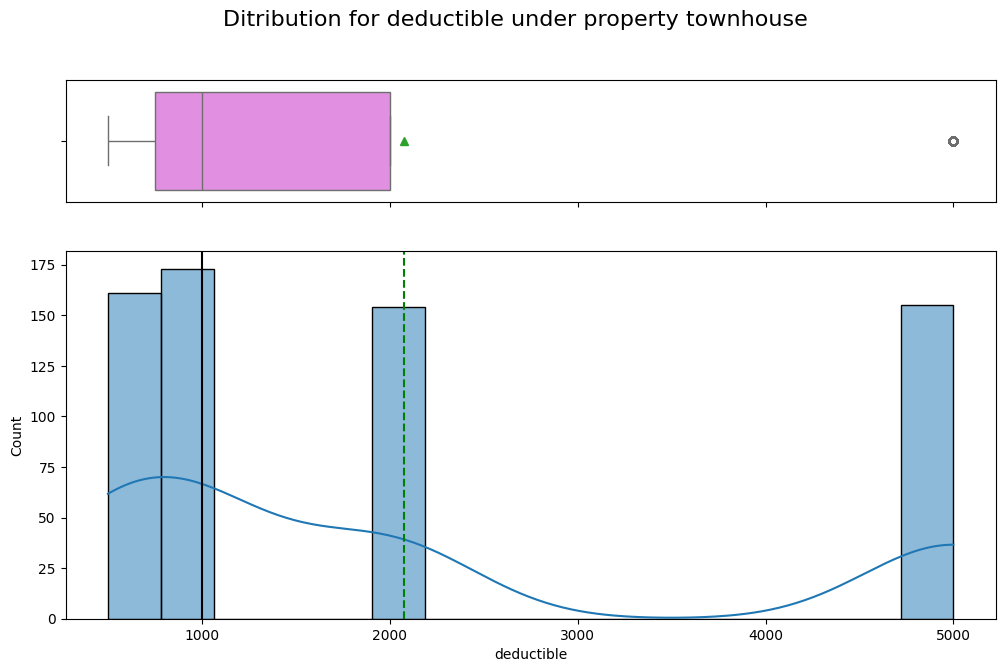

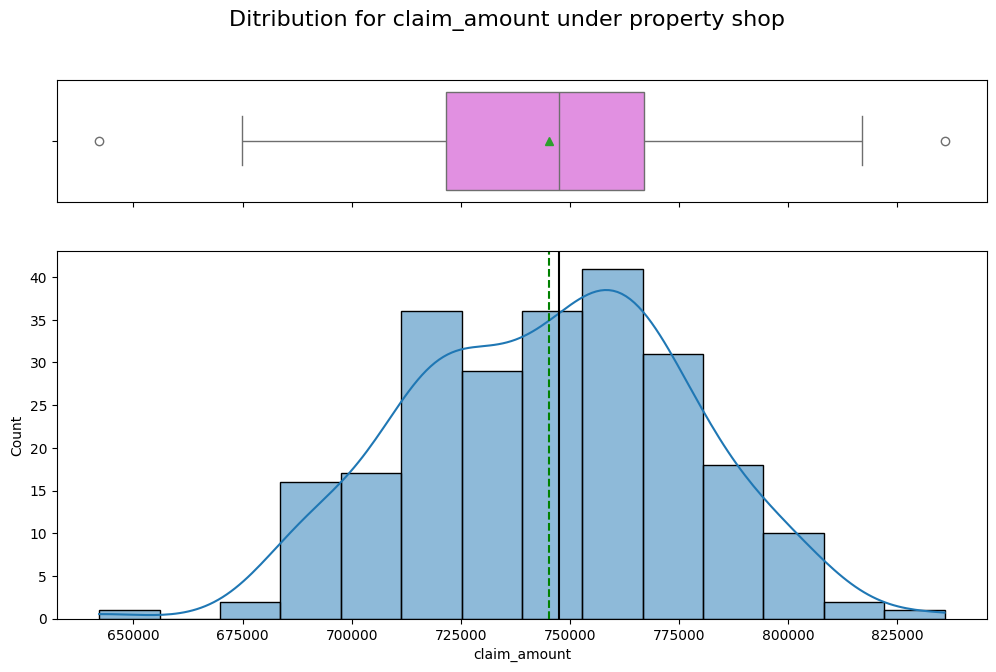

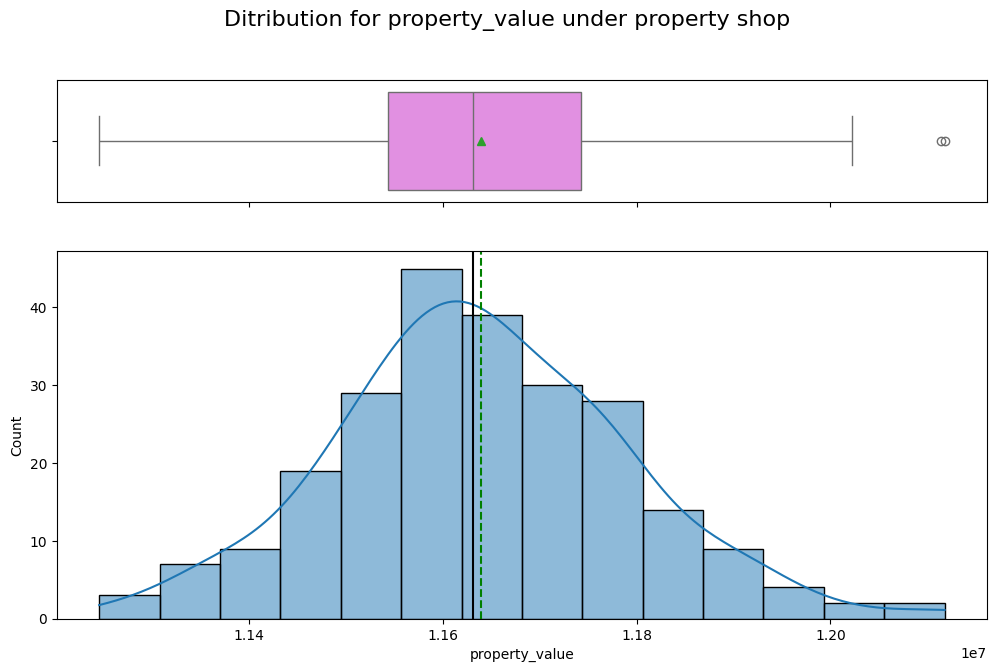

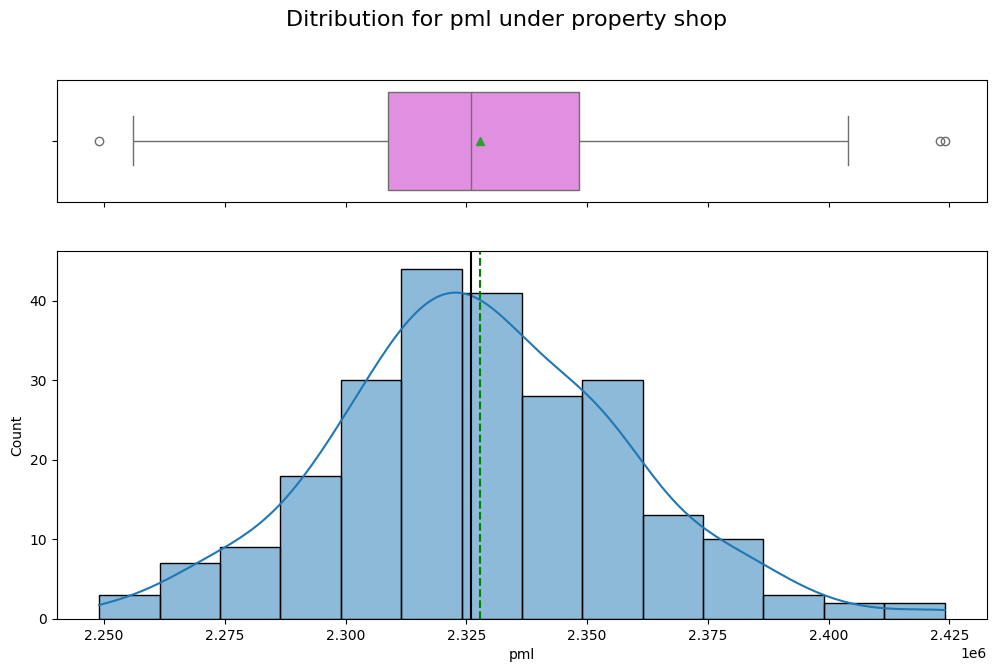

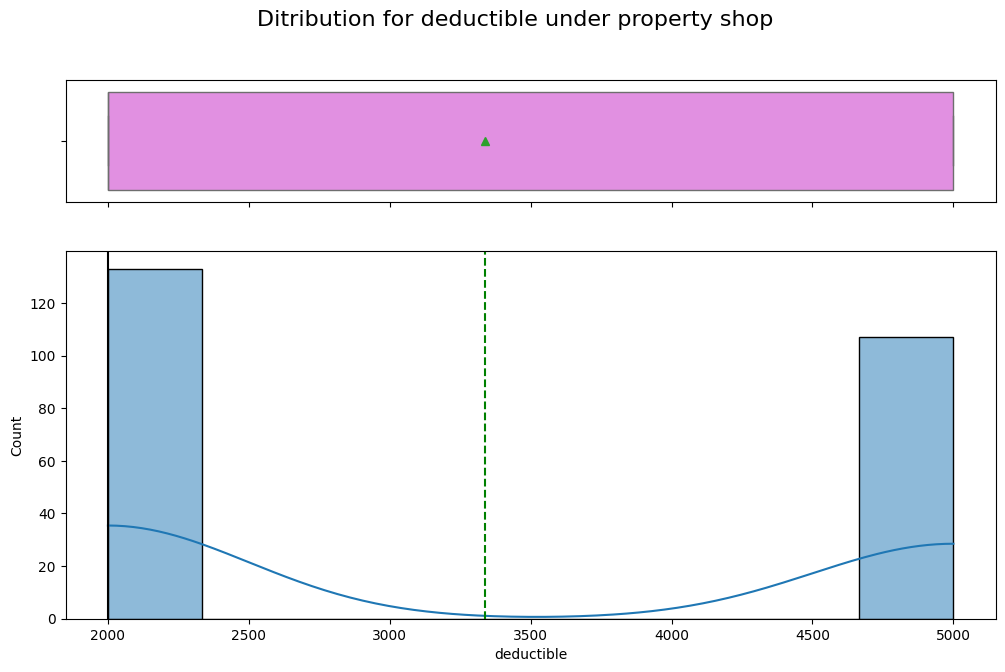

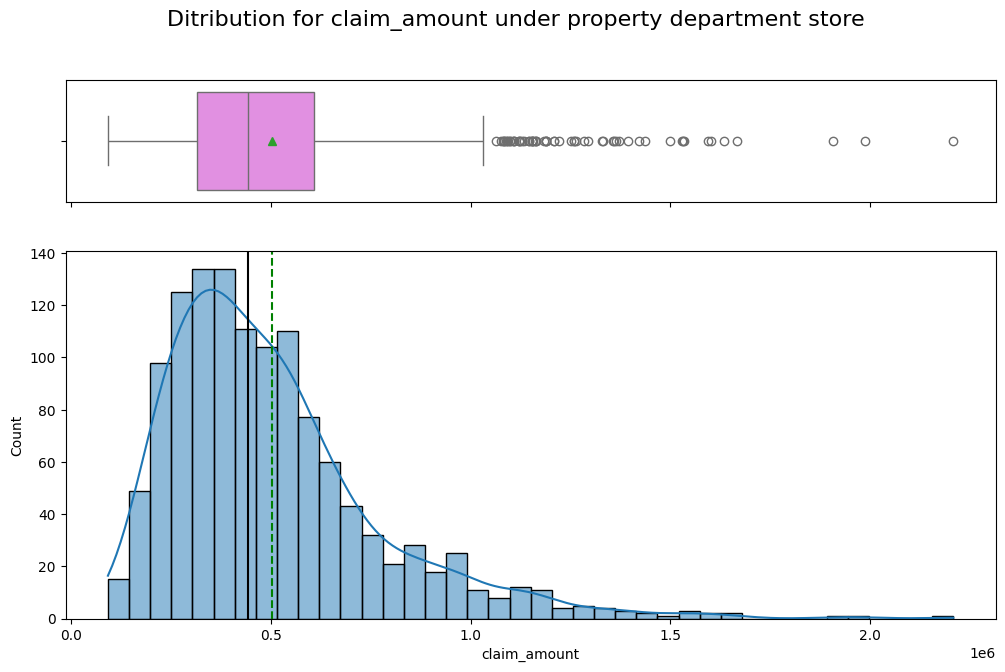

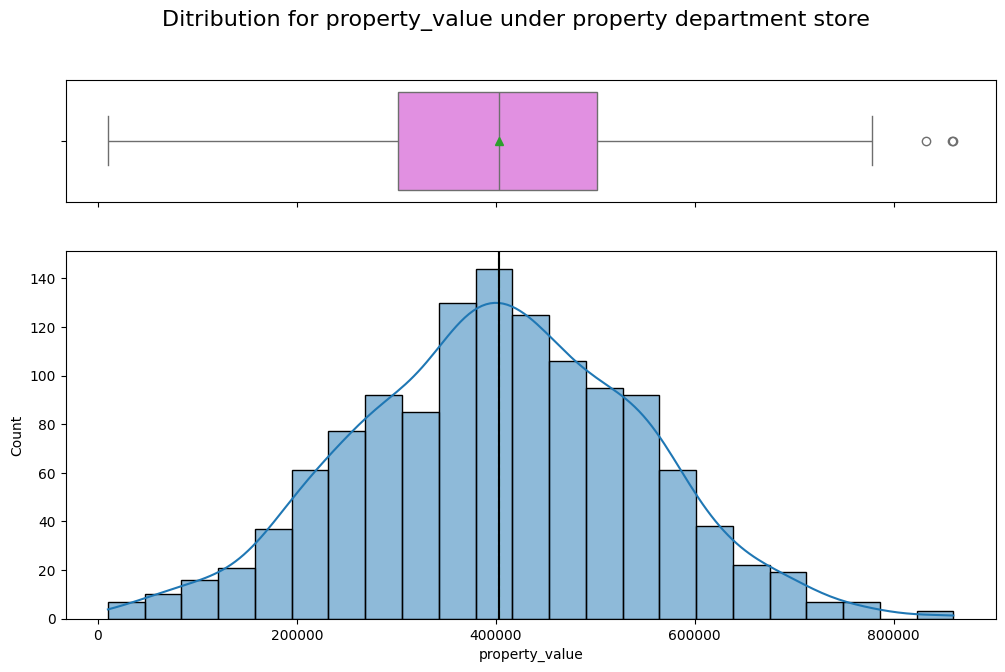

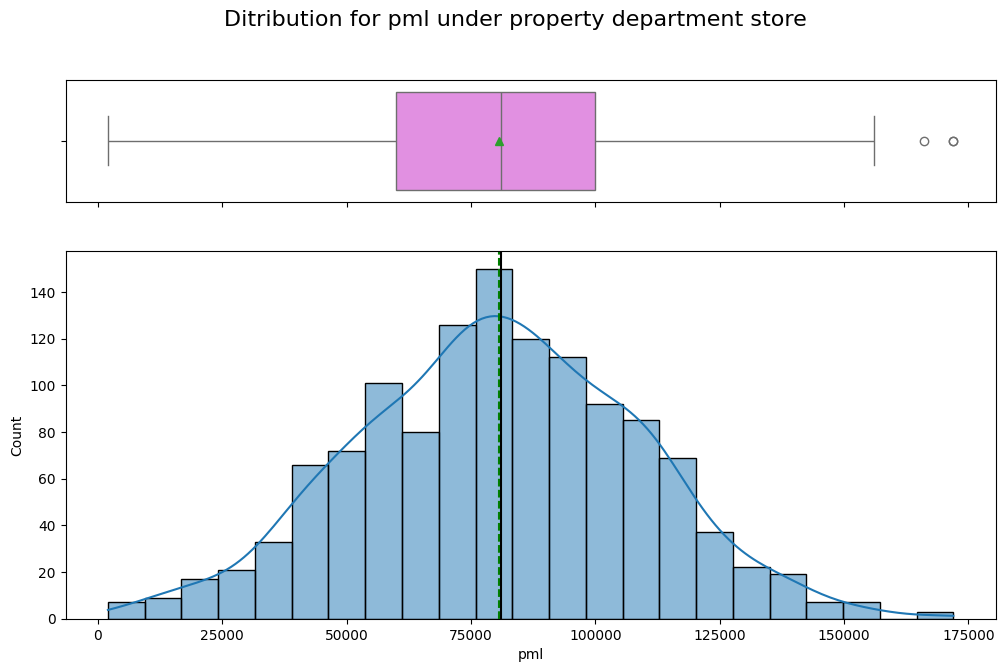

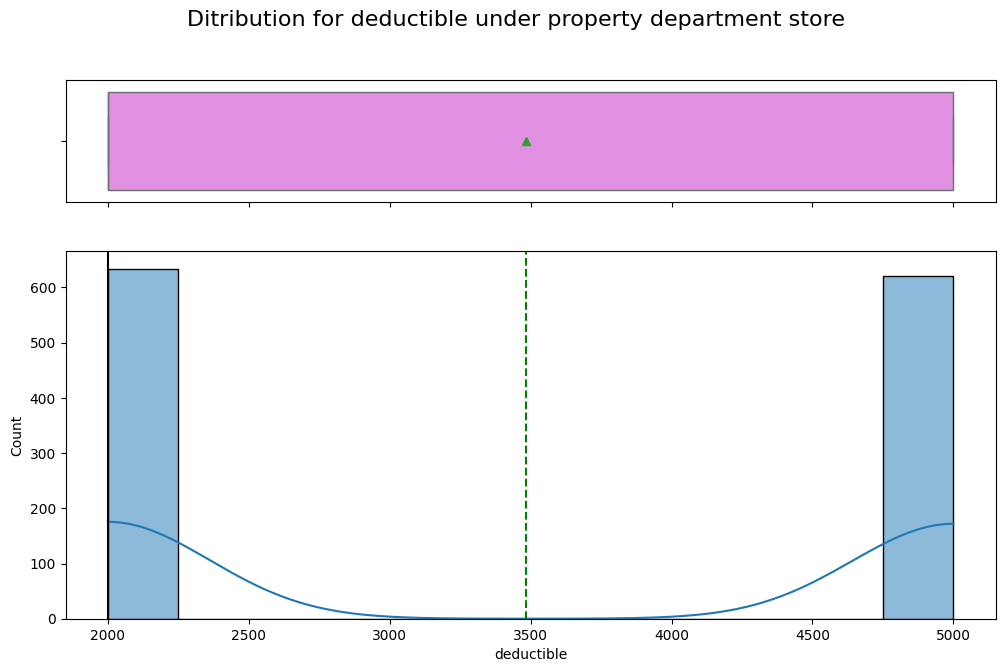

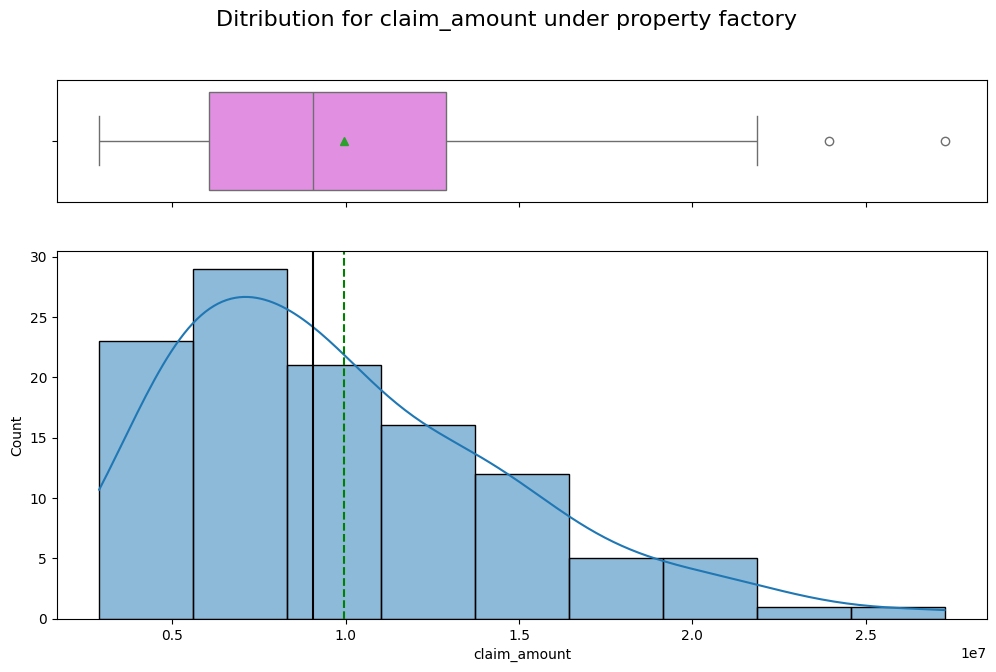

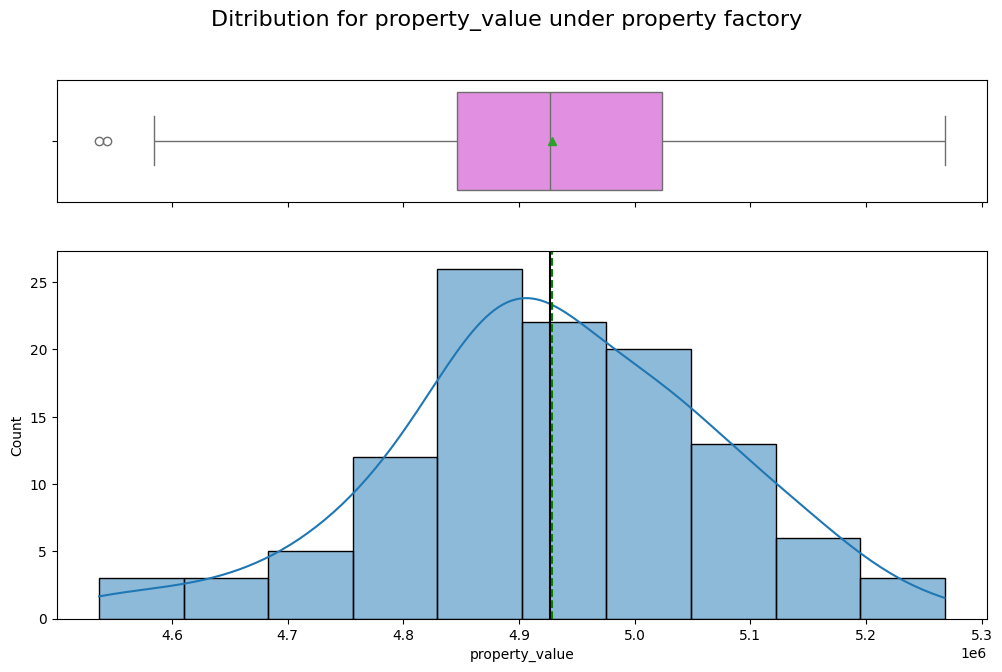

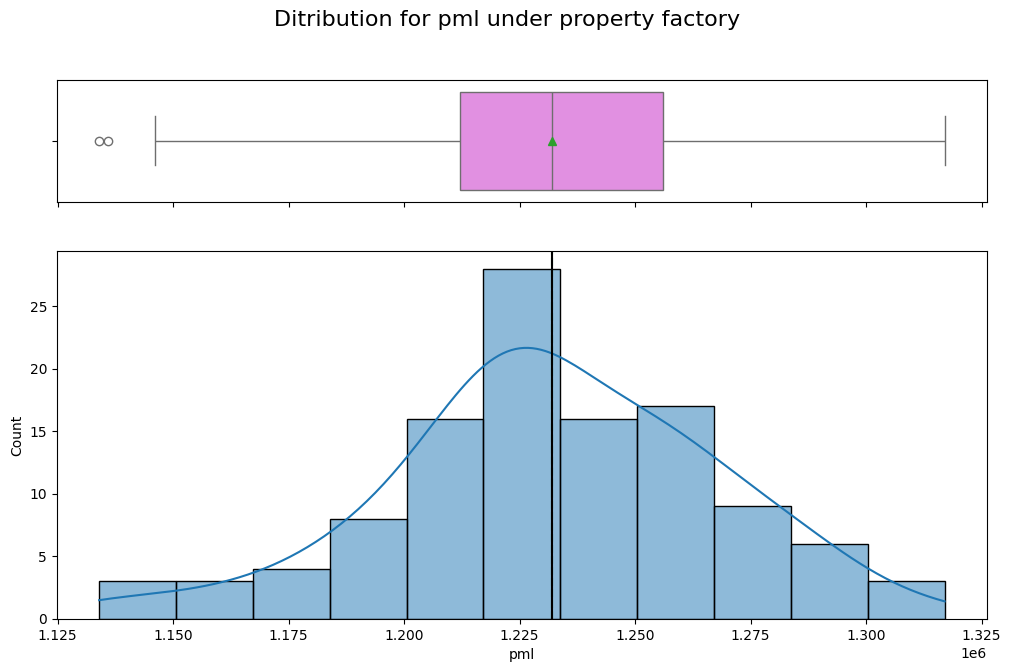

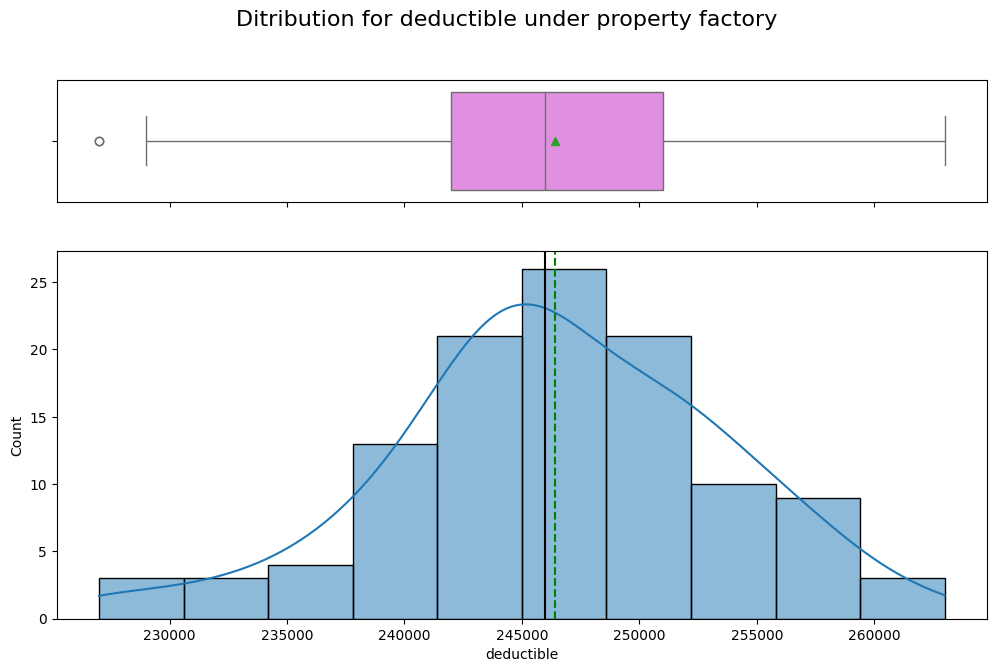

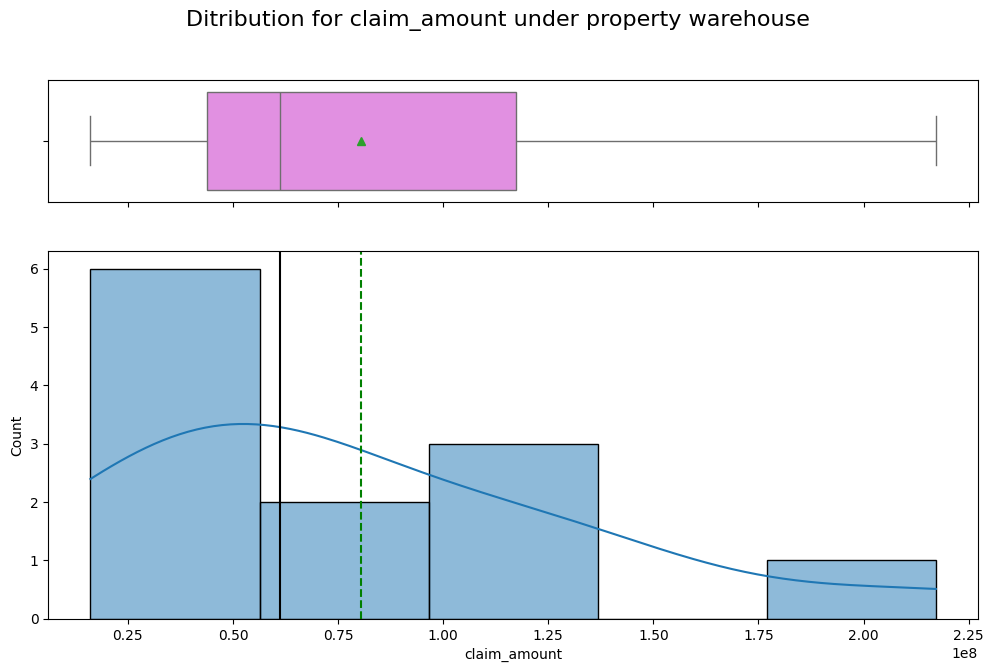

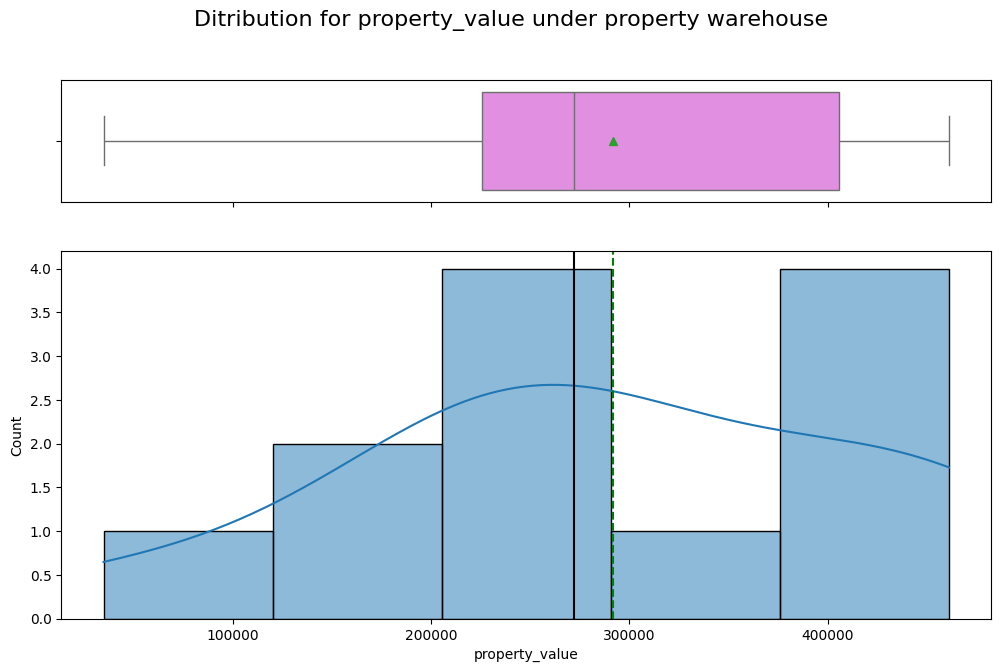

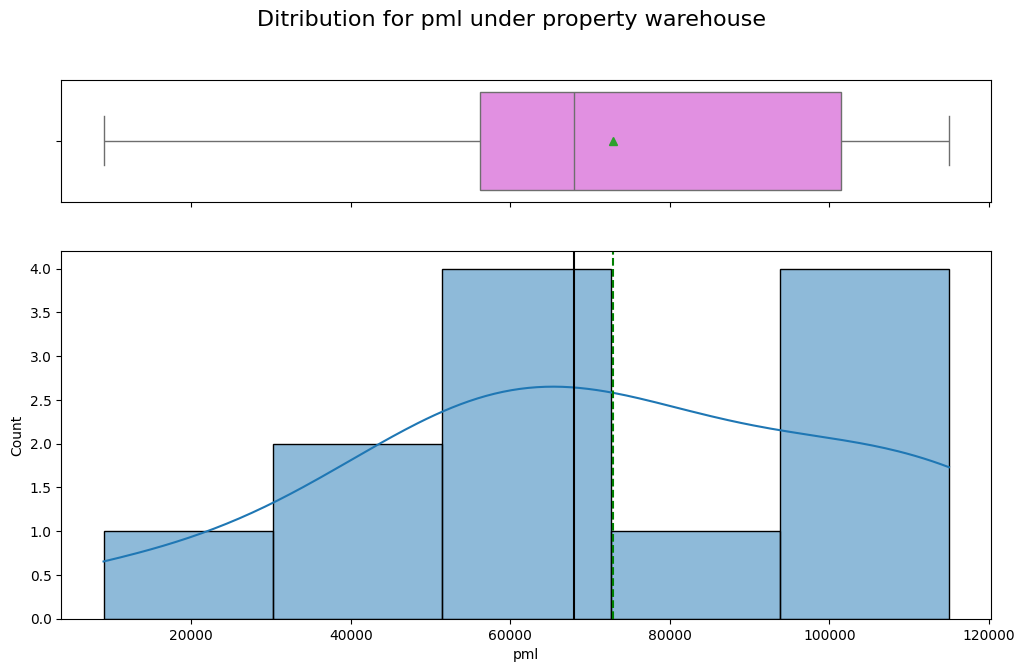

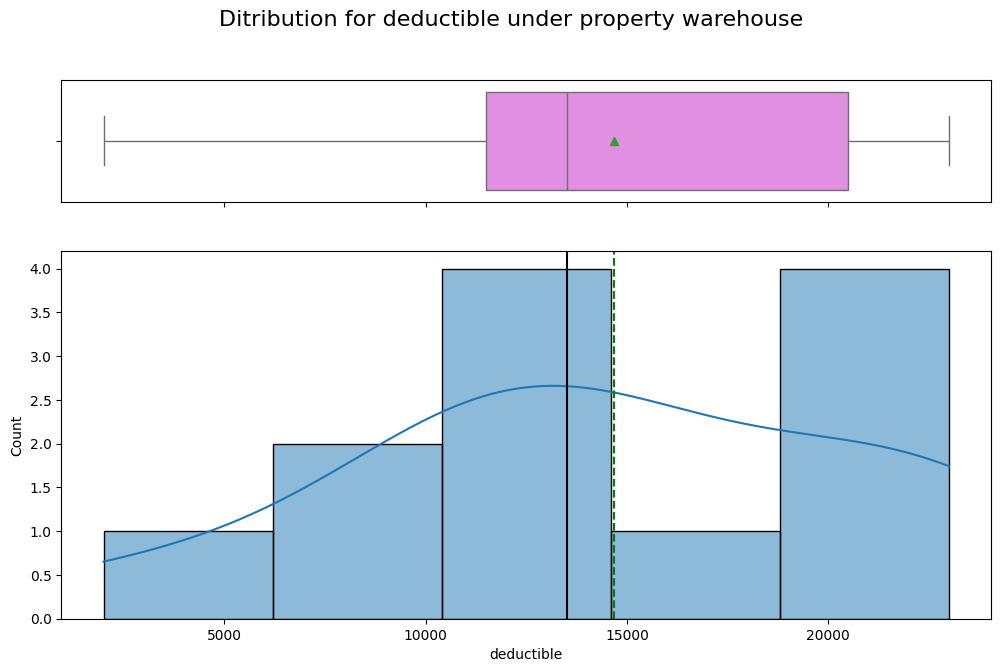

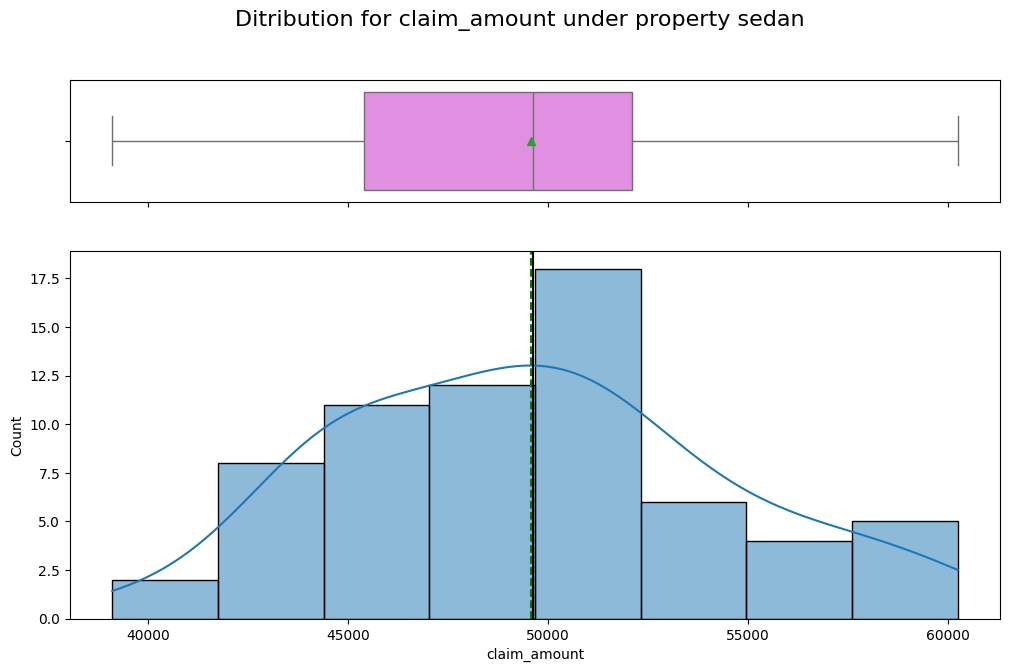

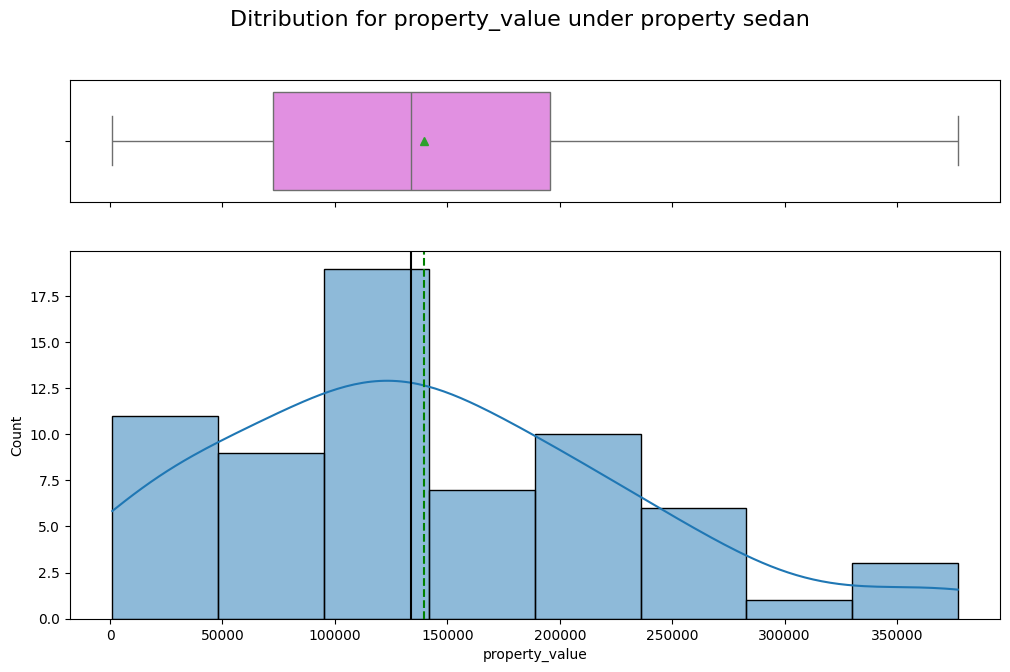

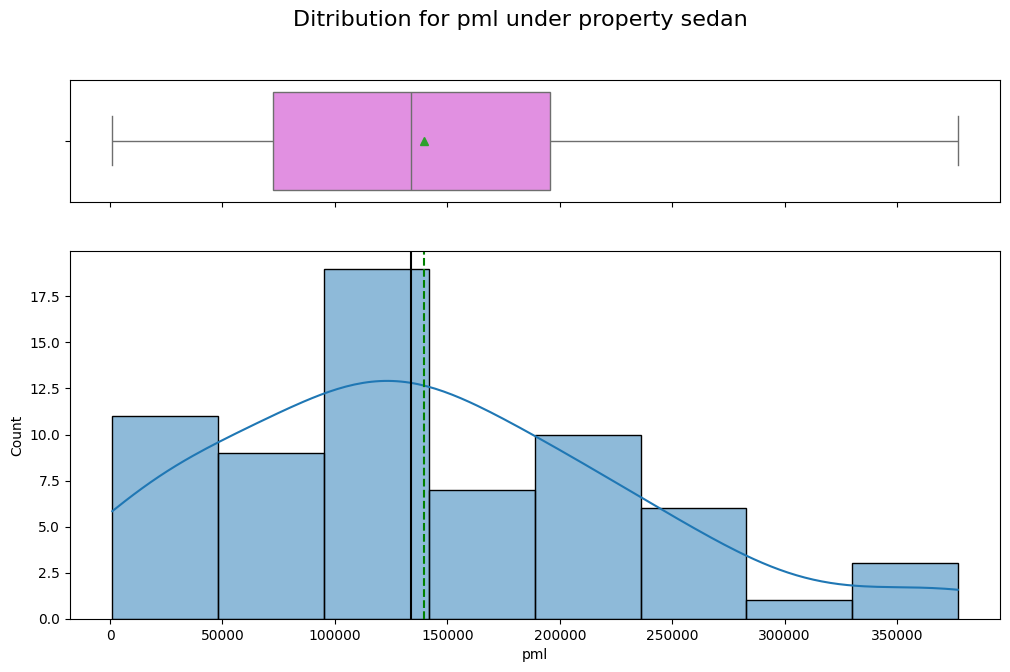

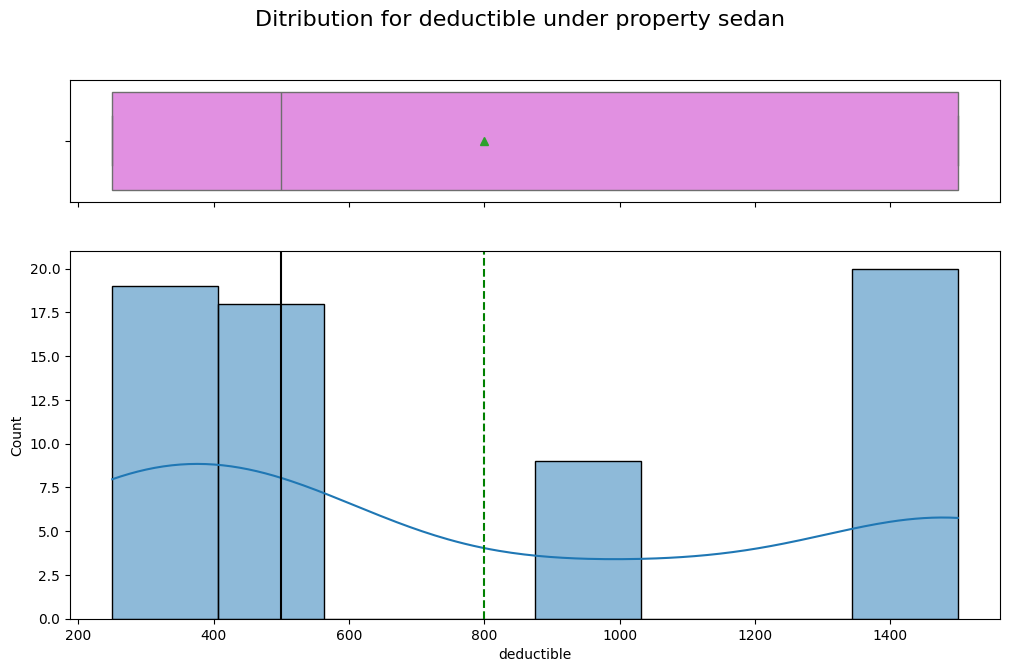

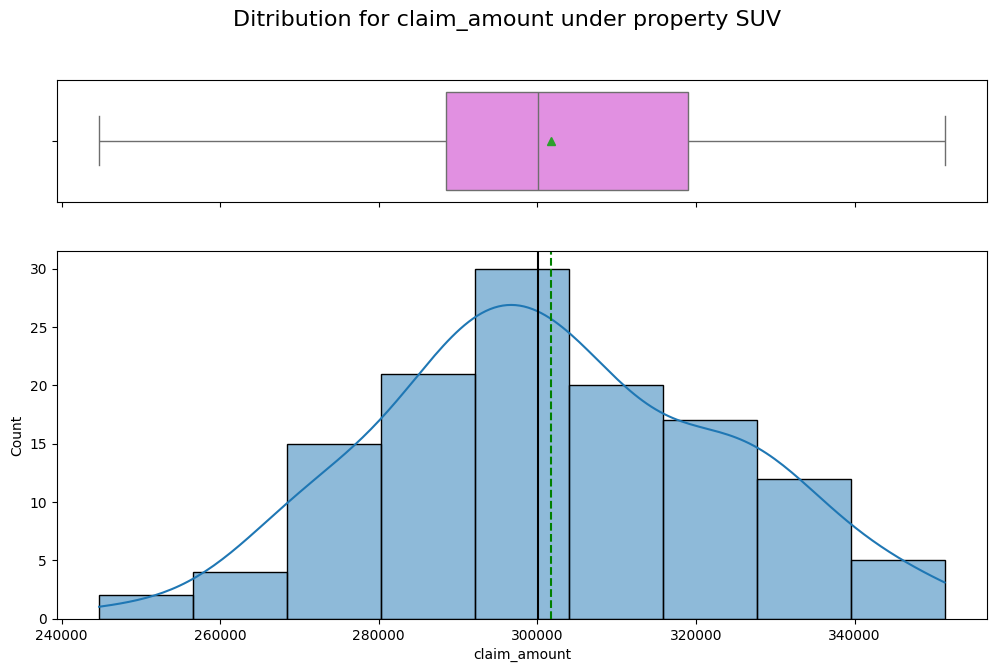

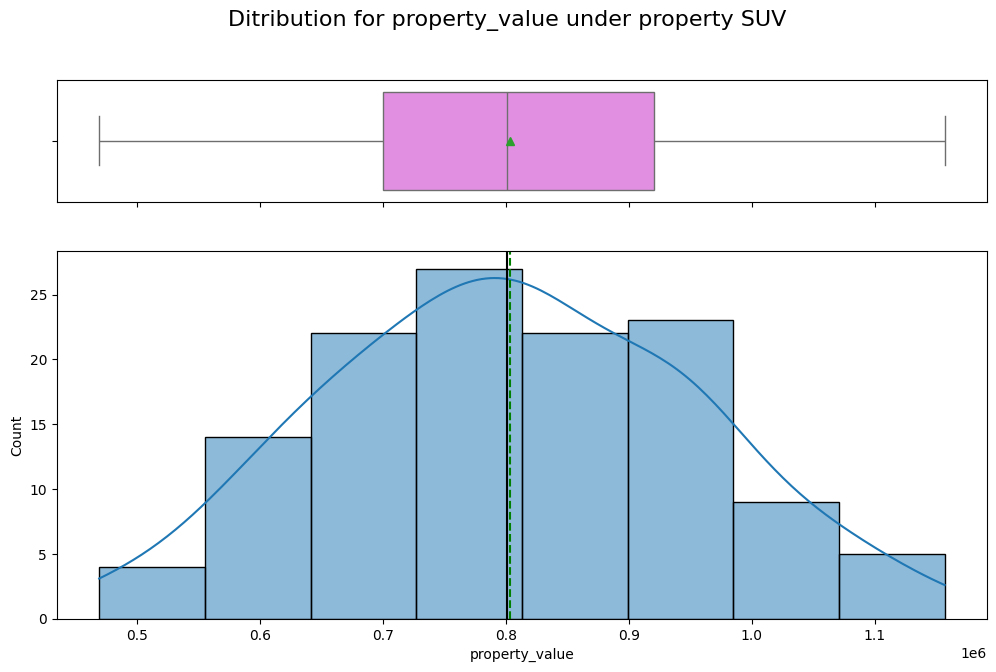

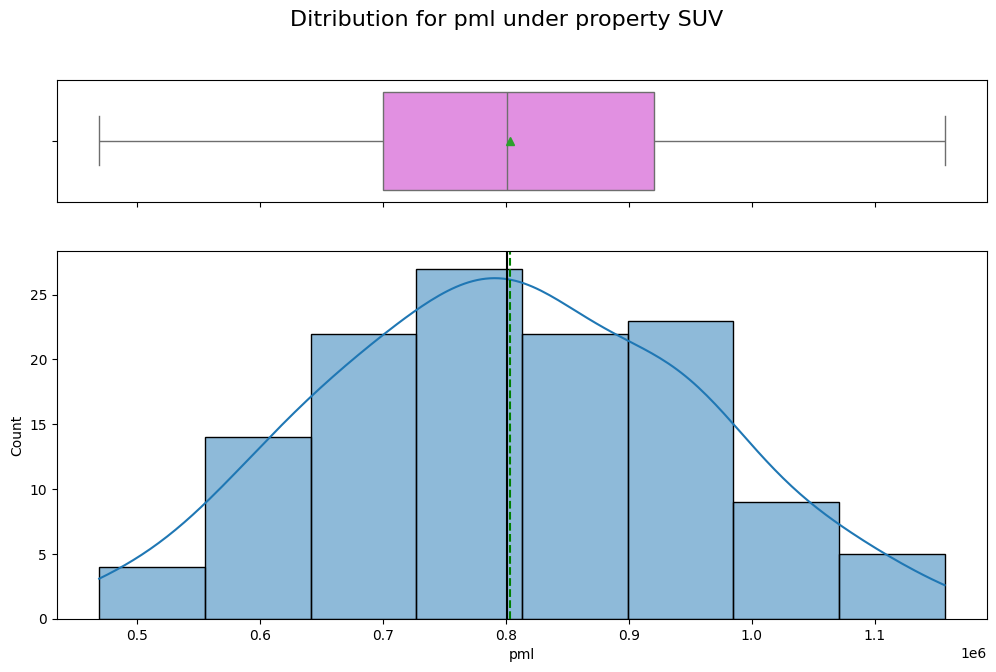

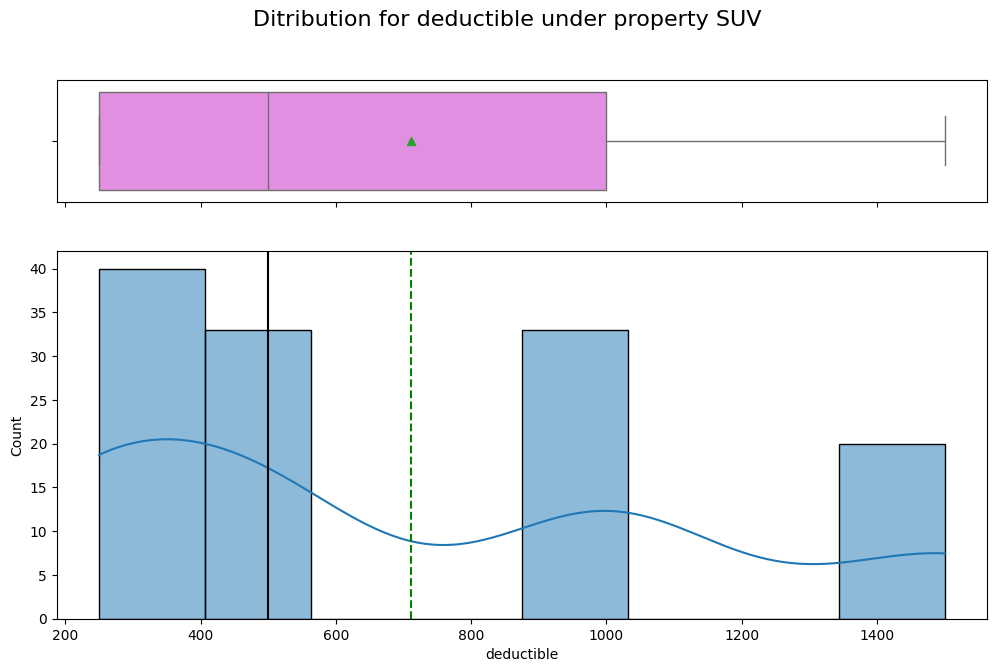

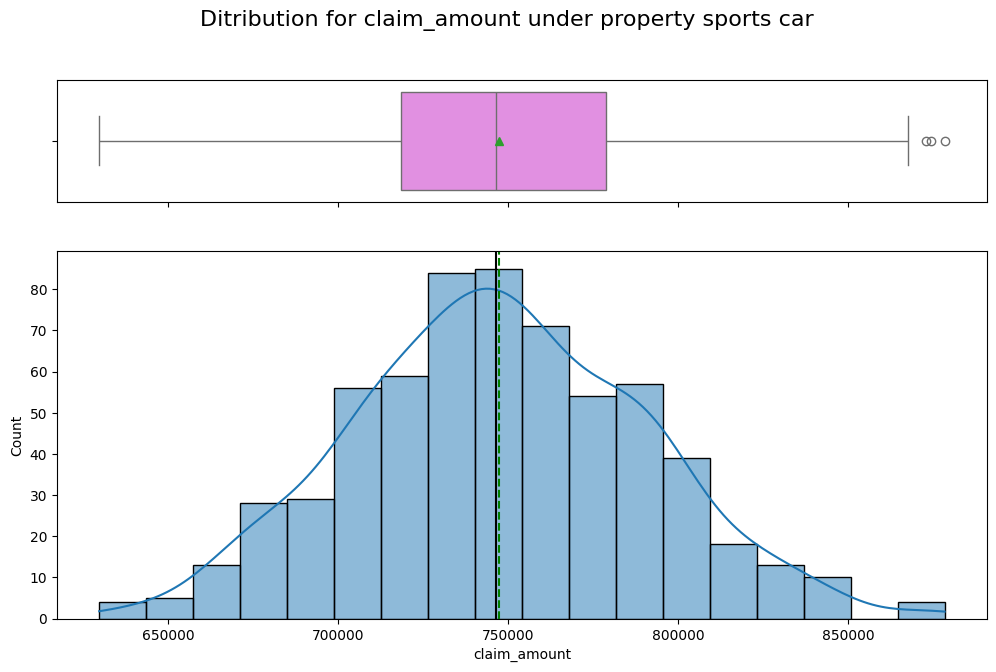

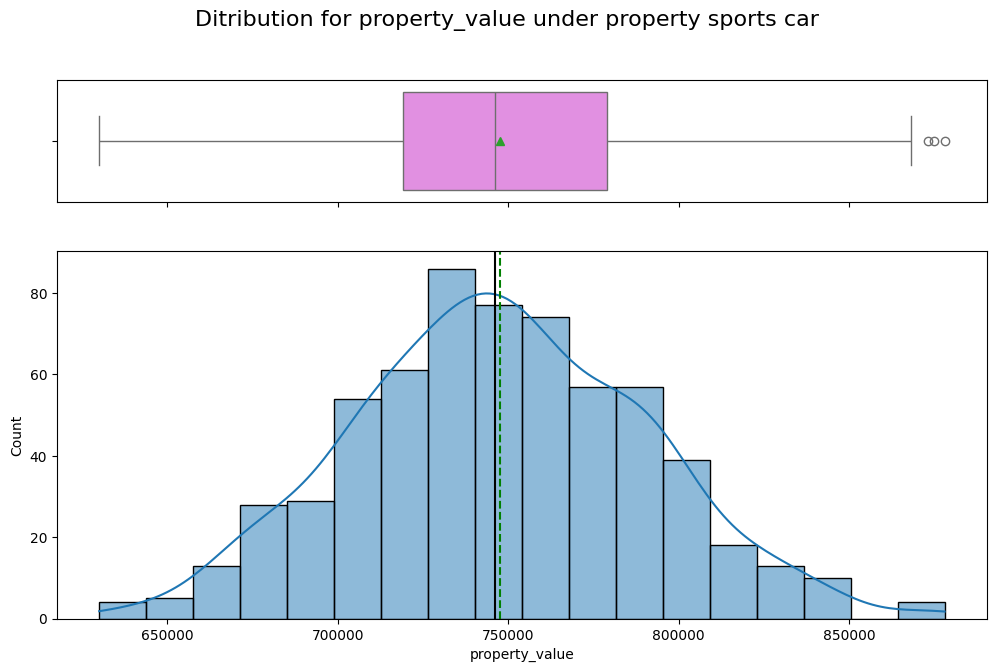

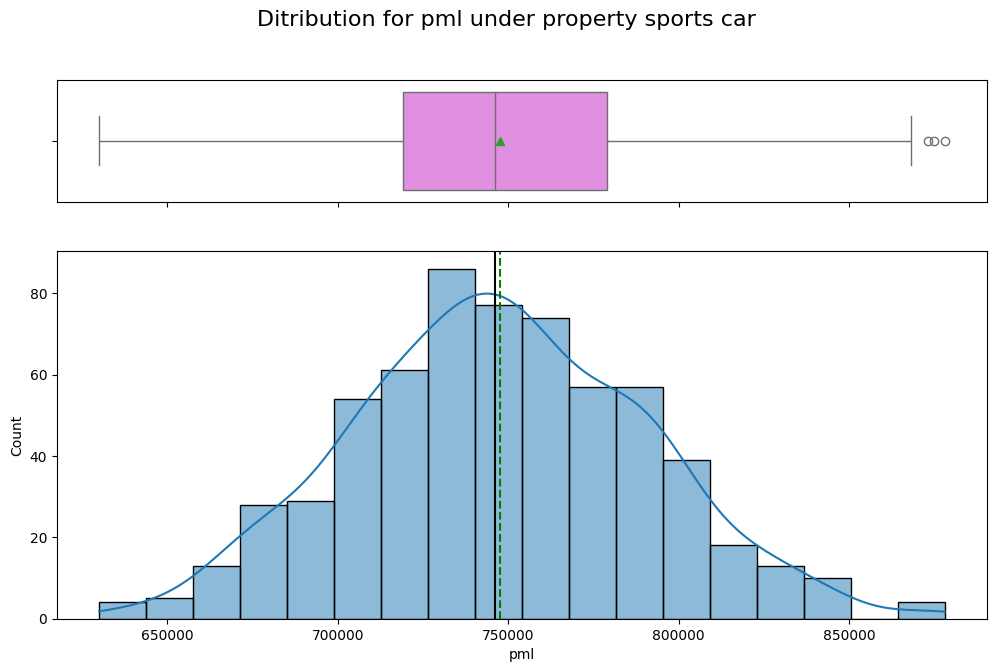

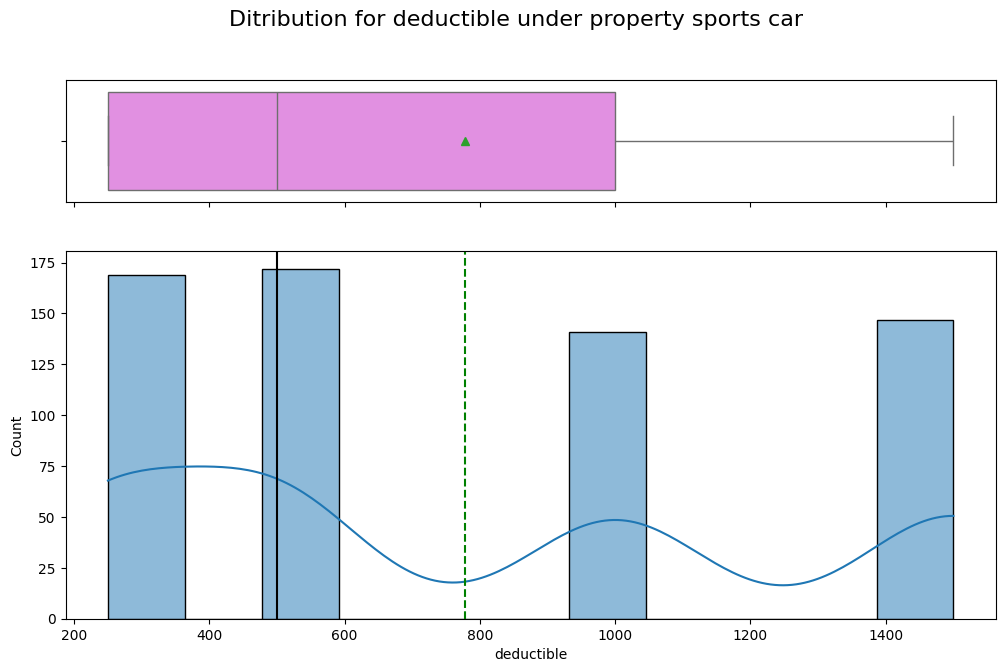

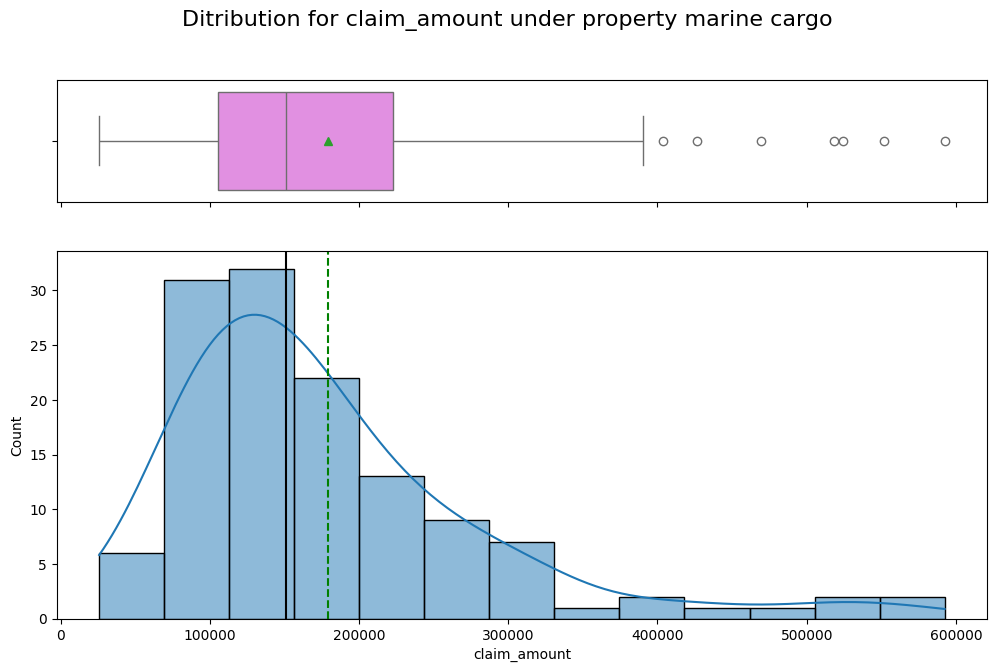

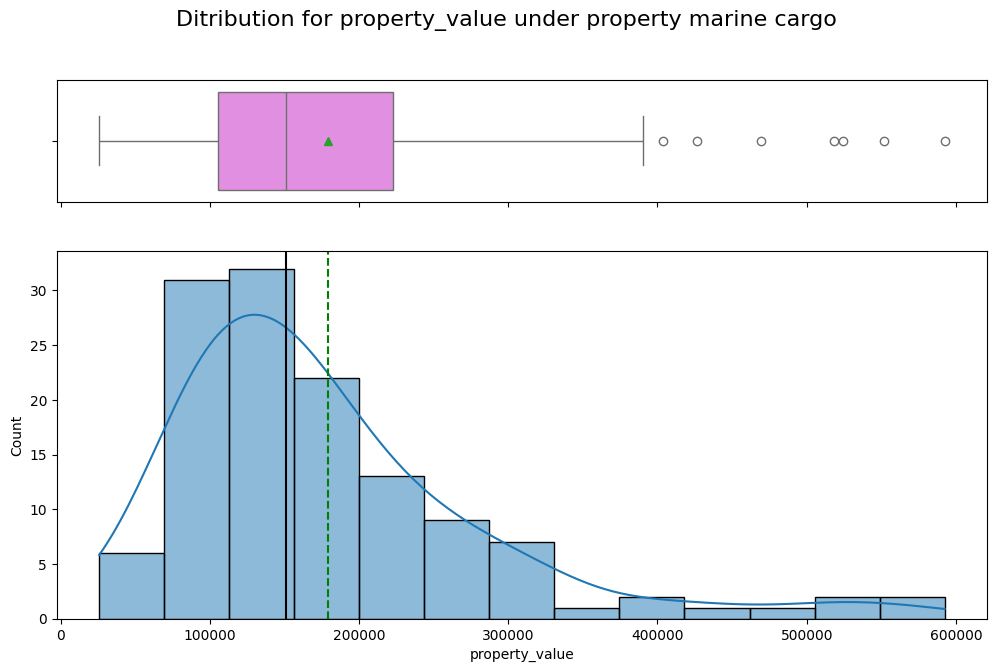

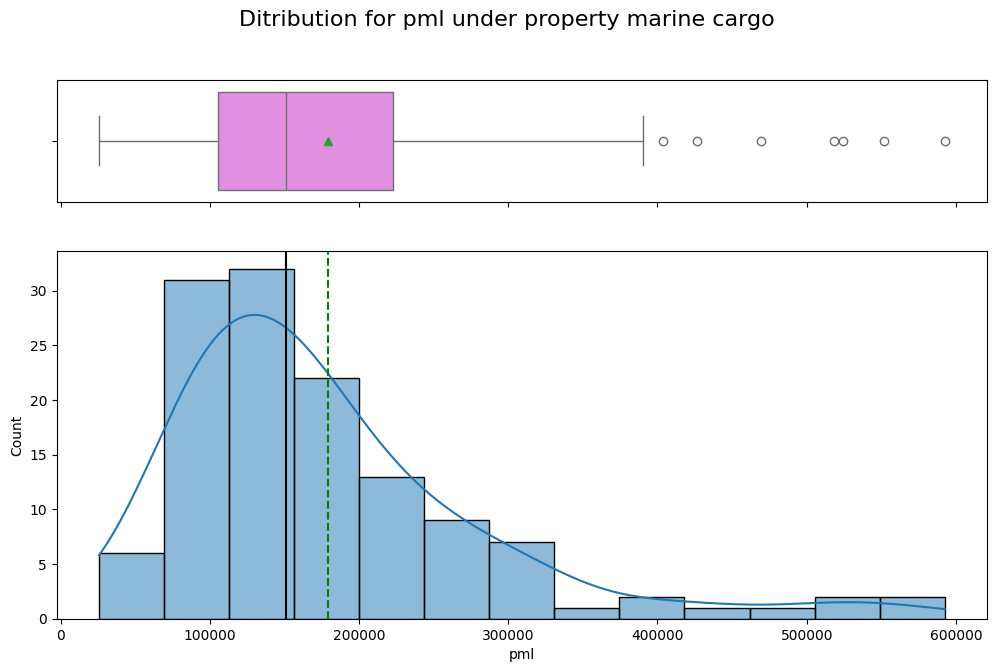

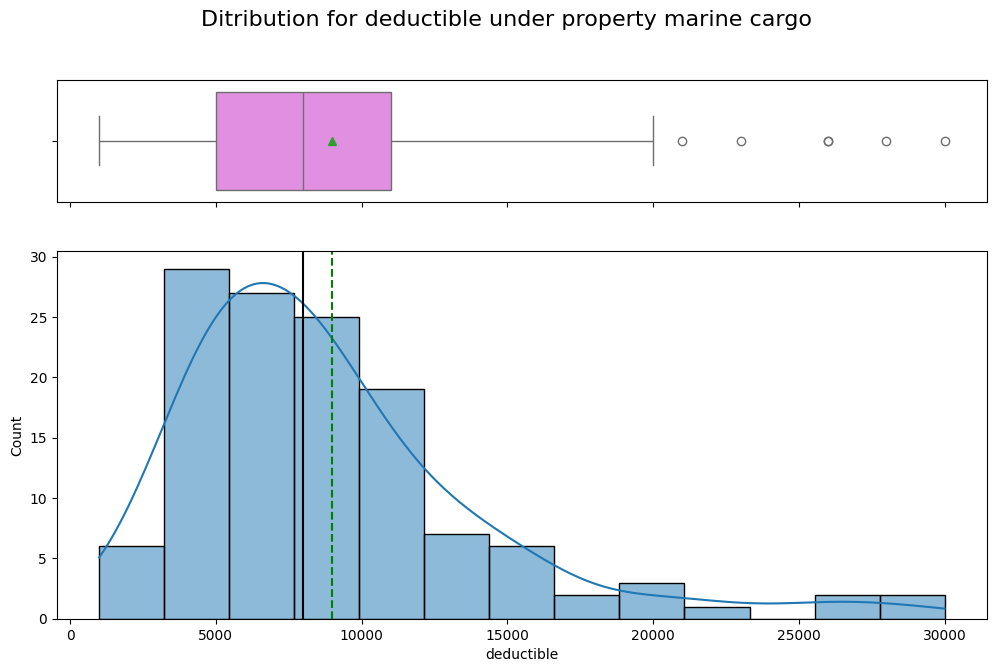

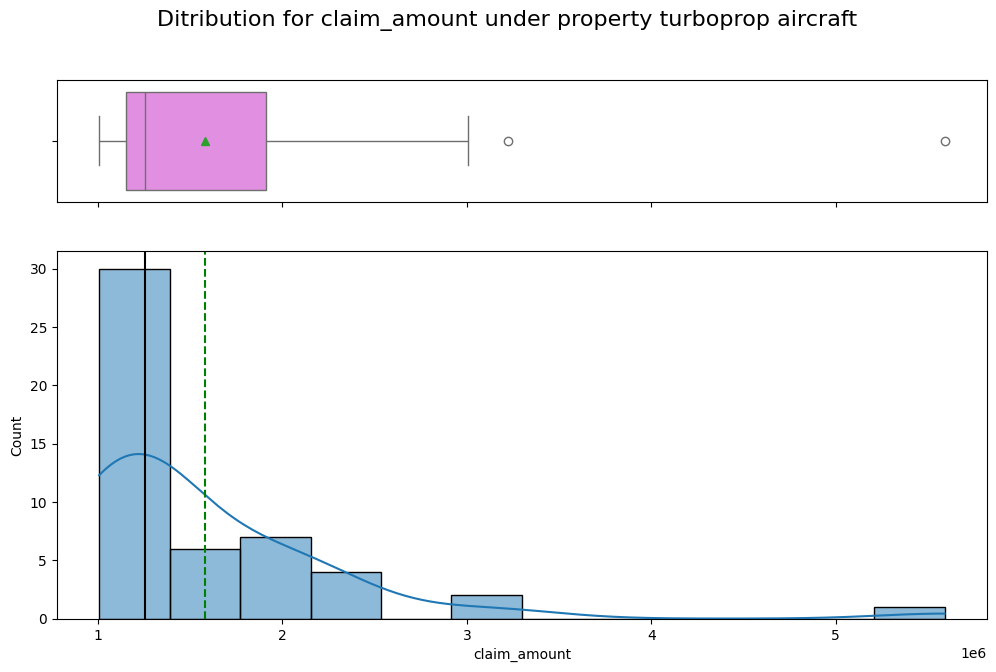

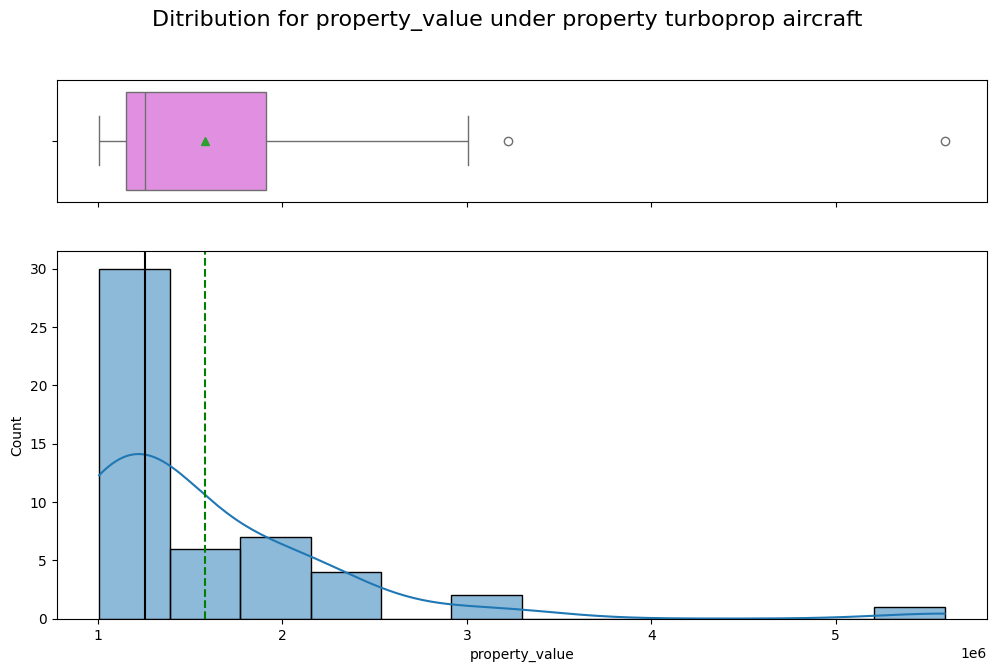

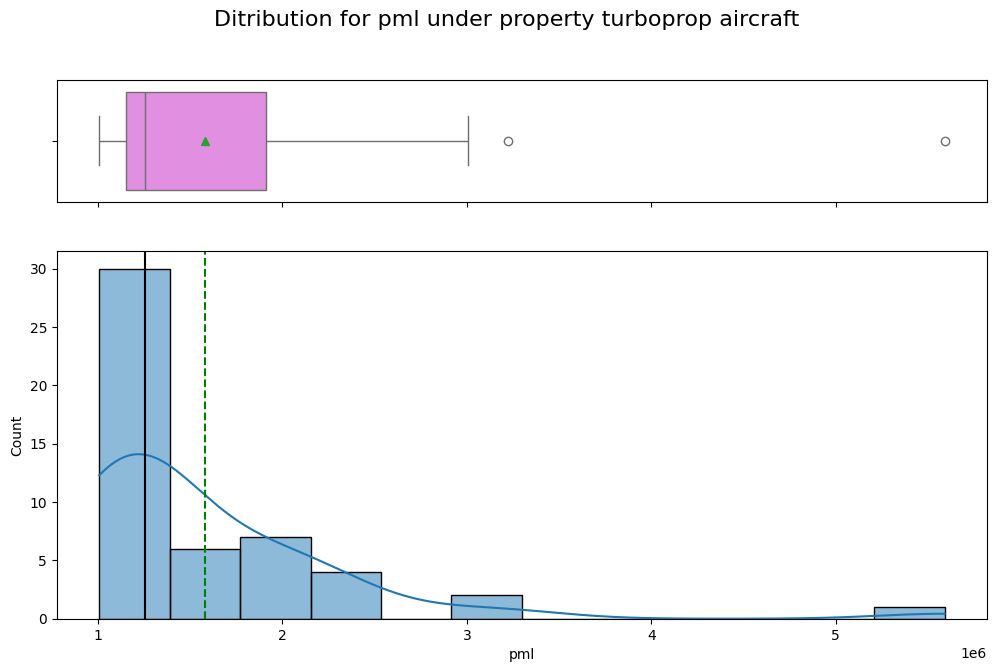

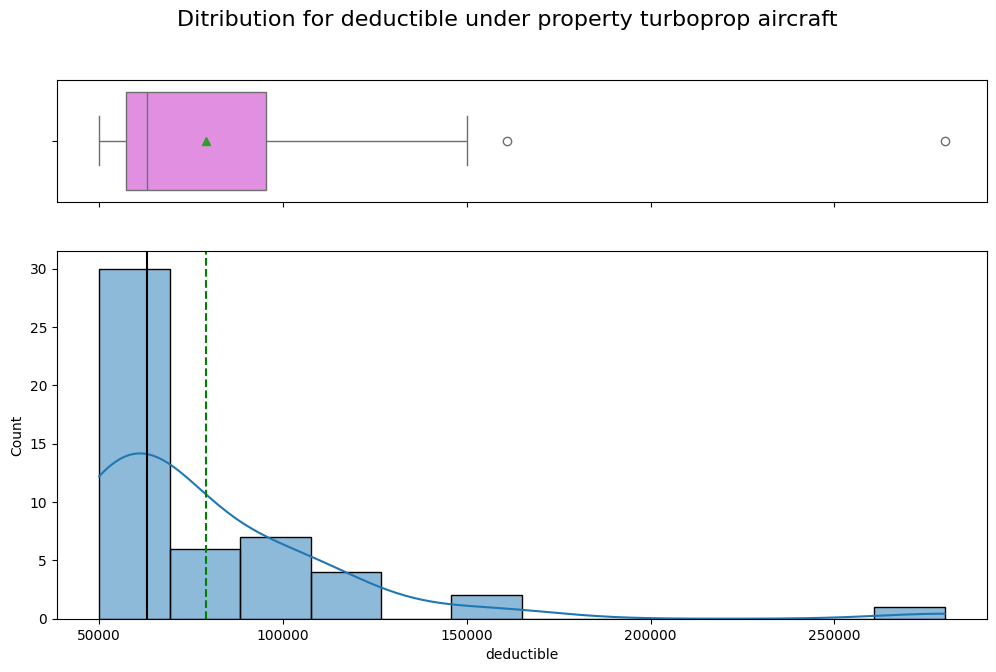

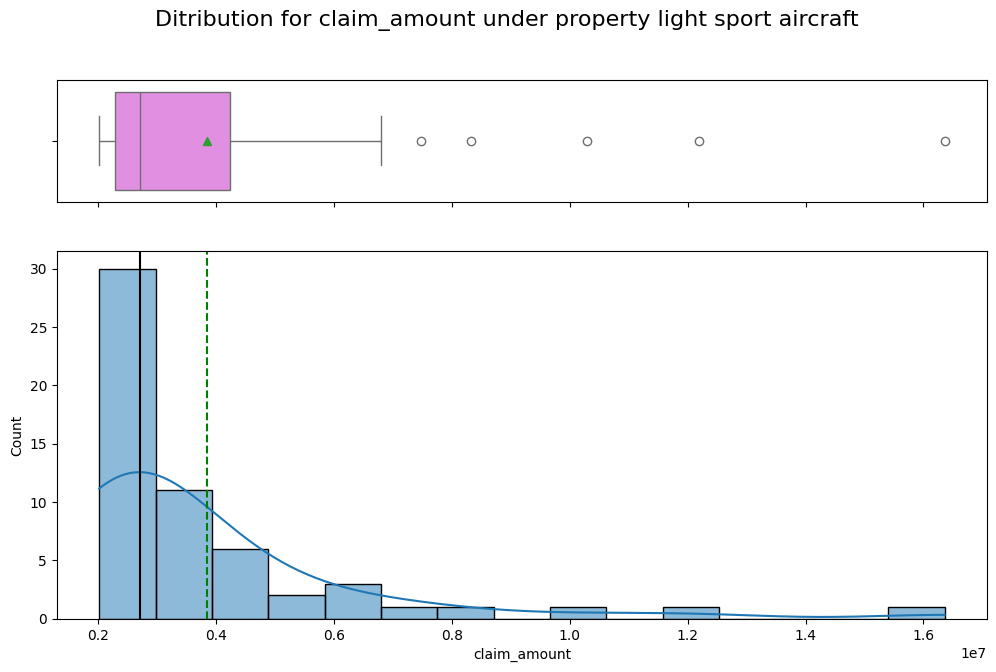

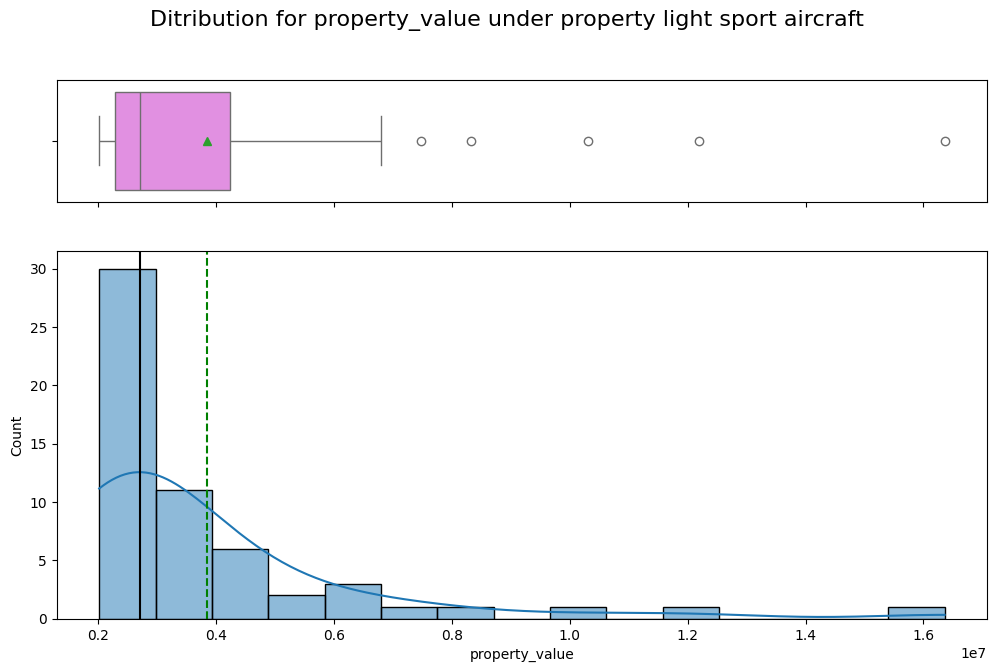

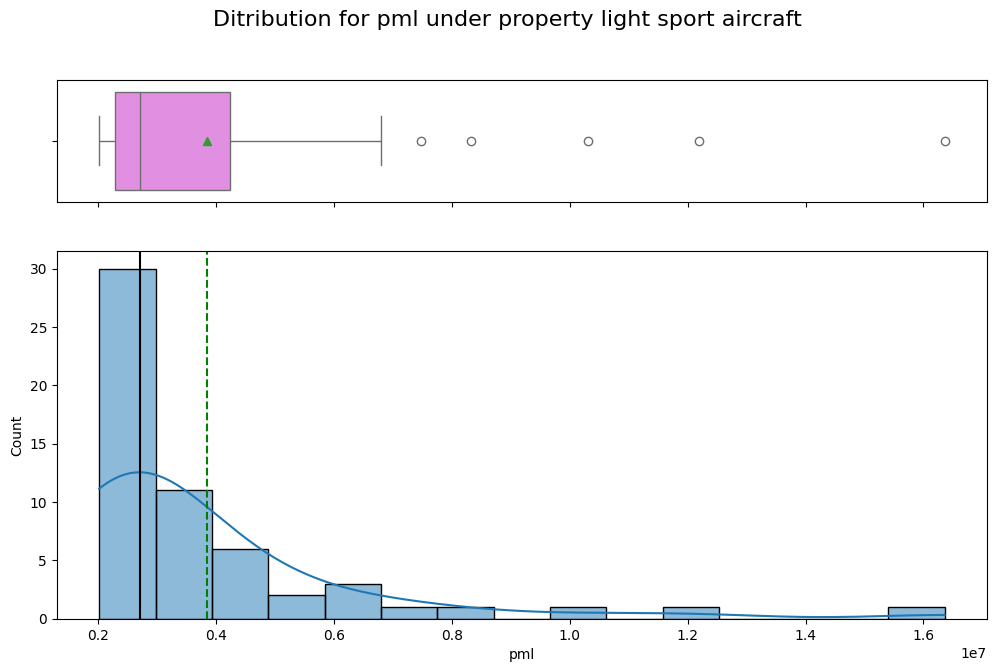

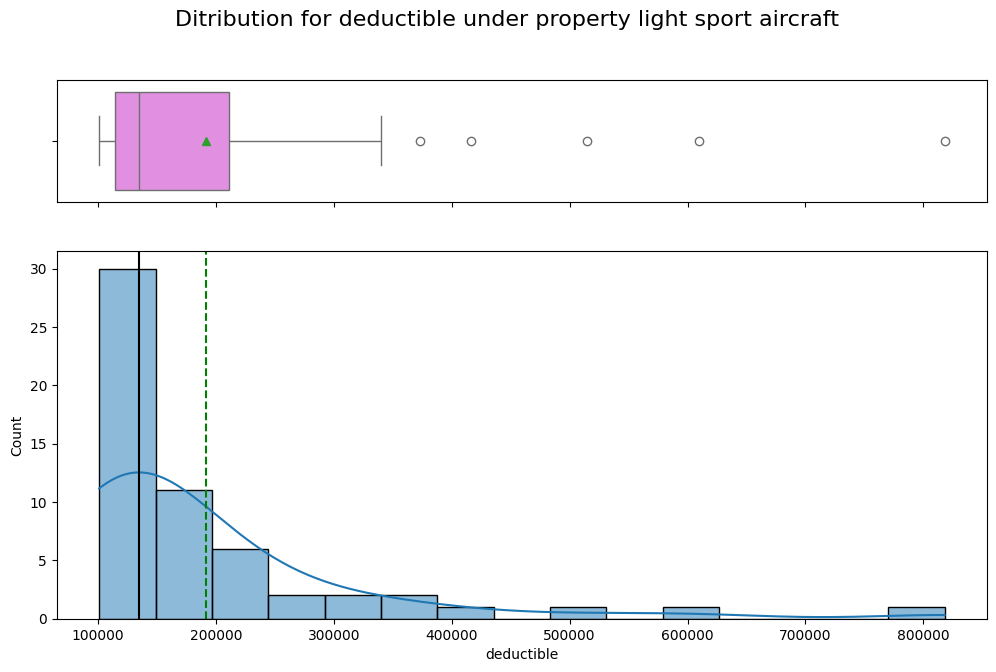

In [17]:
numeric_columns = ["claim_amount", "property_value", "pml", "deductible"]
for l in df_clean["property_type"].unique():
  for i in numeric_columns:
    histogram_boxplot(i, l, data = df_clean[df_clean.property_type == l], feature = i, kde = True)

In [18]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

incident_type         collision  fire  nat cat  other  theft  water damage  \
property_type                                                                
All                         742  5682     2922   1398   1994          4167   
sports car                  487     0       33     36     73             0   
SUV                          85     0       18      4     19             0   
sedan                        54     0        4      5      3             0   
light sport aircraft         48     0        6      3      0             0   
turboprop aircraft           41     0        2      2      5             0   
marine cargo                 27     0       22     64     16             0   
apartment                     0   419      219     97    138           298   
department store              0   526      232      0    153           344   
factory                       0    64       22      0      0            27   
house                         0  4372     2182   1109   1491    

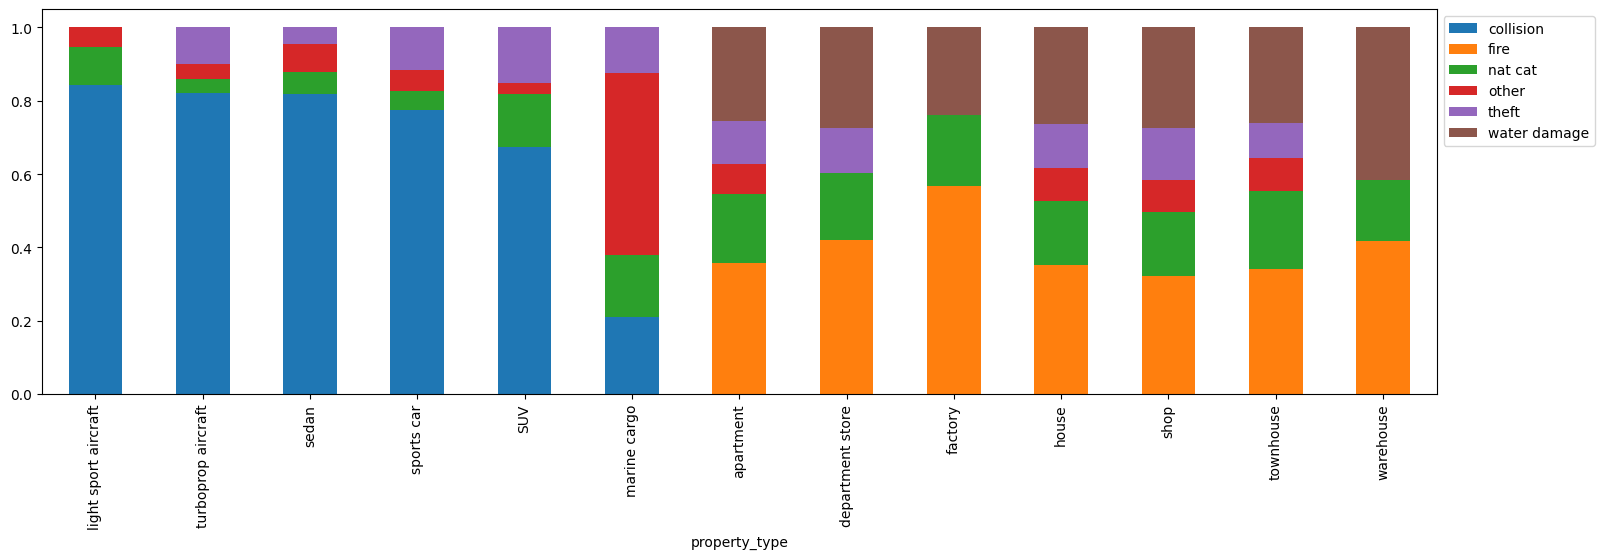

In [19]:
stacked_barplot(df_clean, 'property_type', 'incident_type')

<ipython-input-20-da91e70beff4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_clean, x = df_clean['property_type'], y = df_clean['claim_amount'], palette= "Dark2")


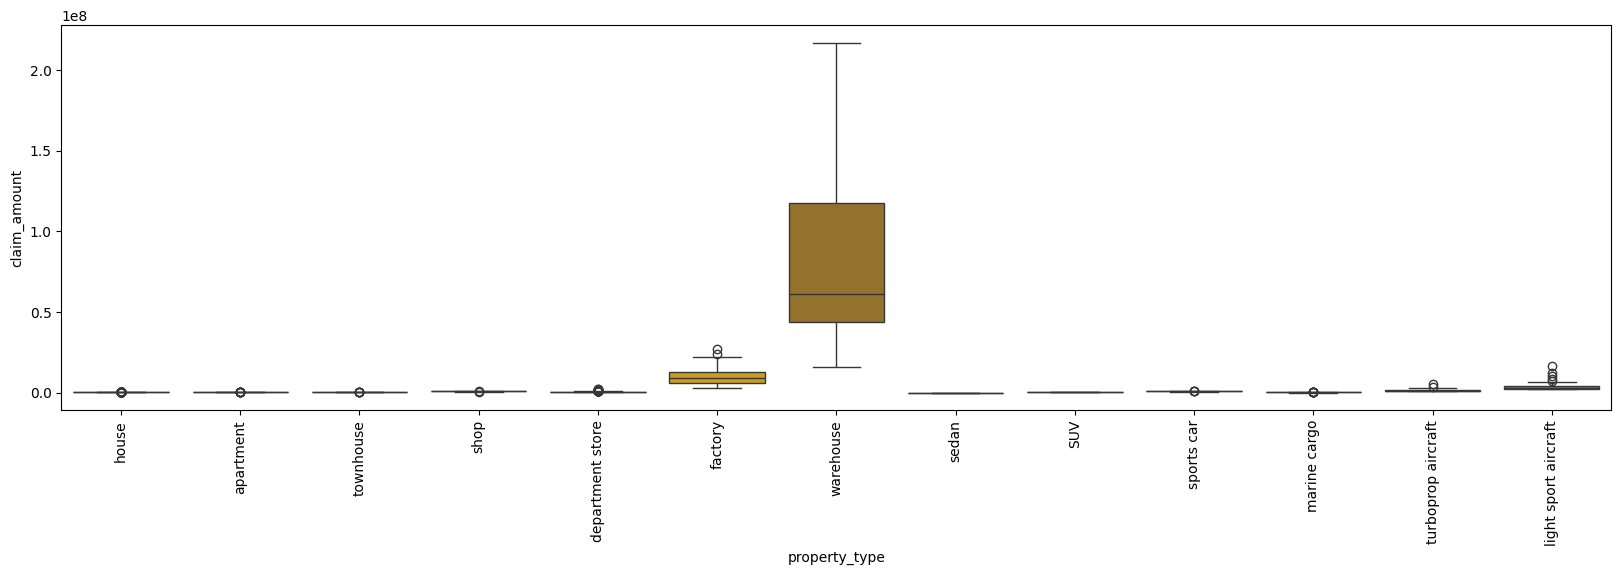

count          mean           std         min  \
property_type                                                           
SUV                     126.0  3.017461e+05  2.166065e+04    244750.0   
apartment              1171.0  1.495294e+05  1.215640e+04    115040.0   
department store       1255.0  5.014931e+05  2.691868e+05     91500.0   
factory                 113.0  9.959479e+06  4.930867e+06   2889100.0   
house                 12414.0  1.998623e+05  1.412081e+04    145590.0   
light sport aircraft     57.0  3.836895e+06  2.680608e+06   2014000.0   
marine cargo            129.0  1.793698e+05  1.053841e+05     25900.0   
sedan                    66.0  4.956682e+04  4.829039e+03     39100.0   
shop                    240.0  7.451504e+05  3.179232e+04    642140.0   
sports car              629.0  7.474824e+05  4.289541e+04    629760.0   
townhouse               643.0  2.512080e+05  1.632283e+04    205790.0   
turboprop aircraft       50.0  1.582360e+06  7.800340e+05   1007000.0   
warehouse                12.0  8.038412e+07  5.798947e+07  16088800.0   

                             25%         50%          75%          95%  \
property_type                                                            
SUV                     288437.5    300125.0     318945.0     337172.5   
apartment               141335.0    149010.0     157440.0     170230.0   
department store        315250.0    442600.0     607950.0    1022730.0   
factory                6066600.0   9049800.0   12886000.0   19558420.0   
house                   190170.0    199490.0     209270.0     223480.5   
light sport aircraft   2284500.0   2700500.0    4228000.0    8724300.0   
marine cargo            105700.0    151300.0     222600.0     398420.0   
sedan                    45400.0     49630.0      52112.5      58497.5   
shop                    721680.0    747610.0     766975.0     796714.0   
sports car              718520.0    746470.0     778710.0     820760.0   
townhouse               240130.0    250650.0     262045.0     279220.0   
turboprop aircraft     1151000.0   1256000.0    1913250.0    2730350.0   
warehouse             43717525.0  61220350.0  117401450.0  172064775.0   

                              99%          max  
property_type                                   
SUV                      348257.5     351360.0  
apartment                178632.0     202950.0  
department store        1406012.0    2208900.0  
factory                23687208.0   27279000.0  
house                    234198.7     270810.0  
light sport aircraft   14026600.0   16359000.0  
marine cargo             544084.0     592400.0  
sedan                     59977.0      60250.0  
shop                     809107.4     835880.0  
sports car               844847.2     878400.0  
townhouse                292162.2     303260.0  
turboprop aircraft      4430660.0    5590000.0  
warehouse             208170075.0  217196400.0

In [20]:
plt.figure(figsize=(20, 5))
sns.boxplot(data = df_clean, x = df_clean['property_type'], y = df_clean['claim_amount'], palette= "Dark2")
plt.xticks(rotation=90, fontsize=10)
plt.show()

df_clean.groupby(['property_type'])['claim_amount'].describe(percentiles = [0.25, 0.50, 0.75, 0.95, 0.99])

<ipython-input-32-ddbd77ee391d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data =  df_no_factory_warehouse, x = df_no_factory_warehouse['property_type'], y = df_no_factory_warehouse['claim_amount'], palette= "Dark2")


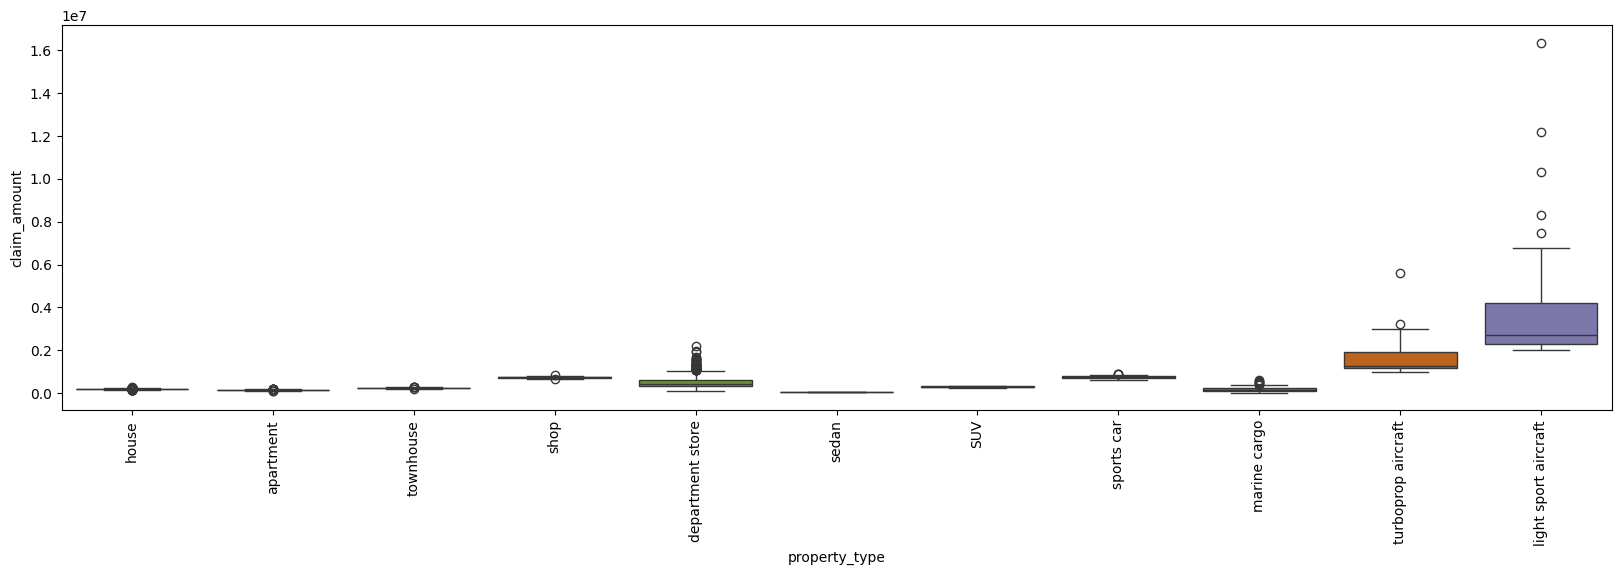

In [32]:
df_no_factory_warehouse = df_clean[(df_clean['property_type'] != 'factory') & (df_clean['property_type'] != 'warehouse')]
plt.figure(figsize=(20, 5))
sns.boxplot(data =  df_no_factory_warehouse, x = df_no_factory_warehouse['property_type'], y = df_no_factory_warehouse['claim_amount'], palette= "Dark2")
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [21]:
def preprocess_data(data, target, denied_label='denied', new_label='others'):
    """
    Preprocess the data to combine all non-denied classes into a single class.
    """
    data2 = data.copy()
    data2["claim_status"] = data[target].apply(lambda x: denied_label if x == denied_label else new_label)
    return data2

def plot_comparative_barplot(data, feature, target):
    """
    Plot barplot for categorical features comparing 'denied' class with others.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, hue=target, palette="Paired")
    plt.title(f'Comparative Barplot of {feature}')
    plt.xticks(rotation=45)
    plt.show()


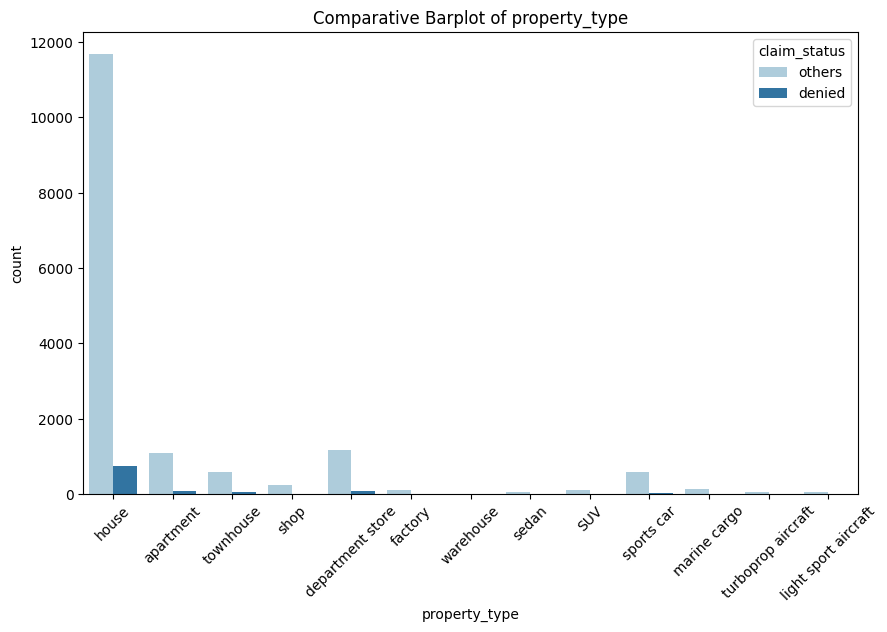

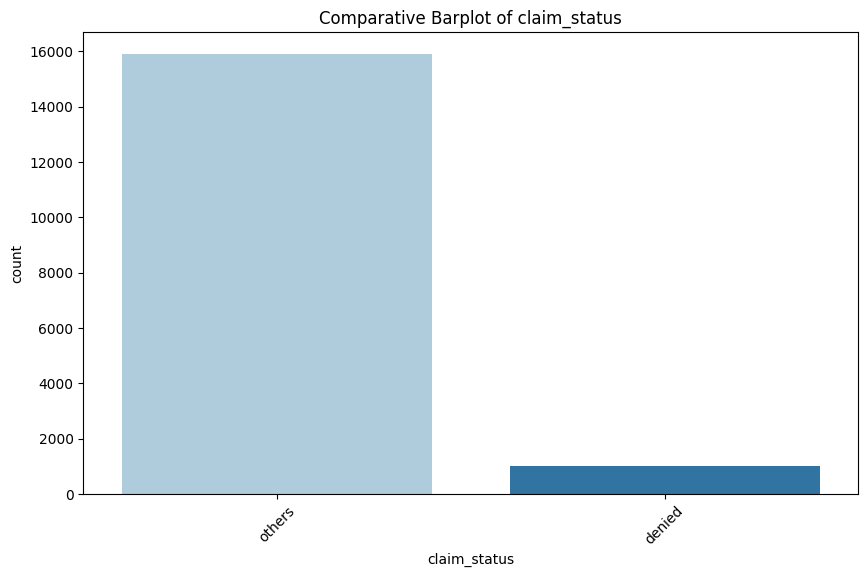

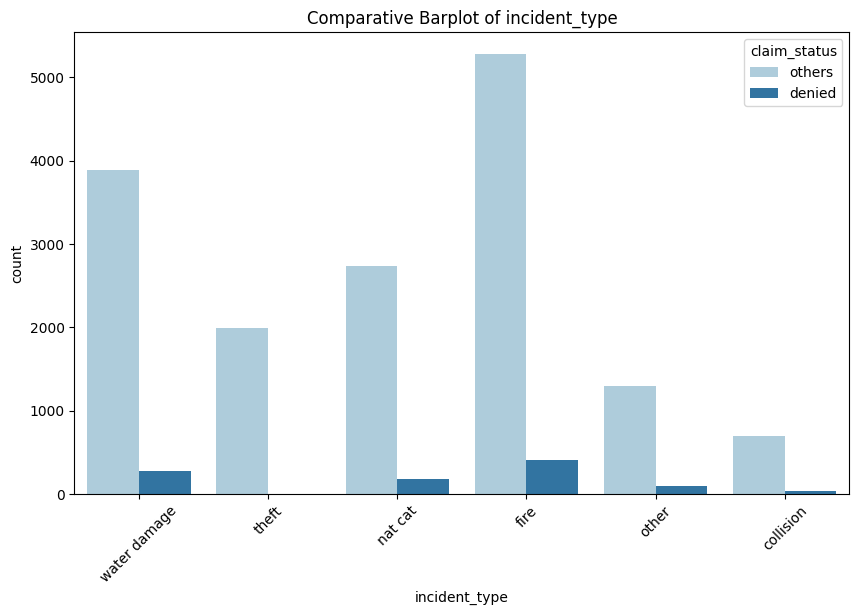

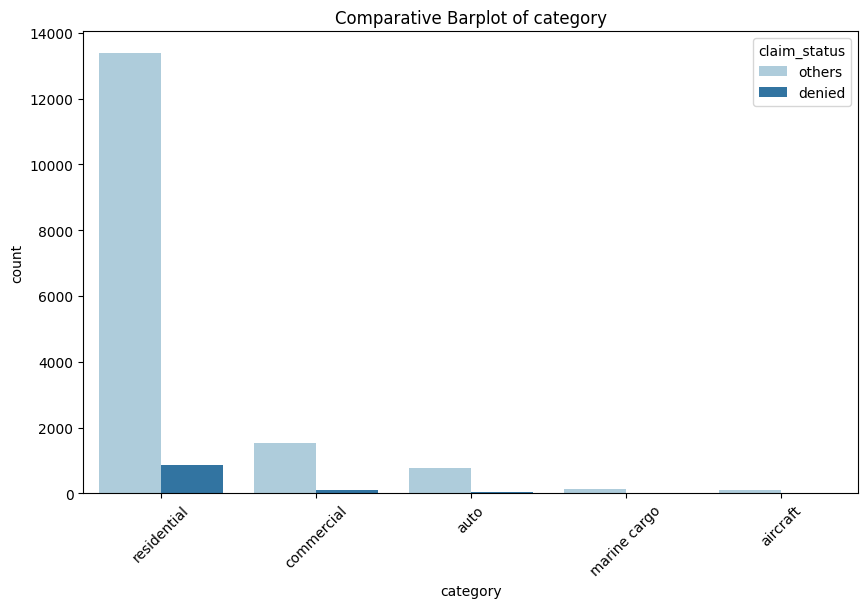

In [22]:
for i in categorical_columns:
  plot_comparative_barplot(data = preprocess_data(df_clean, 'claim_status'), feature = i, target = "claim_status")

In [23]:
def plot_correlation_for_classes(data, categorical_col, num_col1, num_col2):
    """
    Plot correlation visualization for two numeric columns for each class in a categorical column.
    """

    # Create a scatter plot with regression lines for each class
    g = sns.lmplot(
        data=data,
        x=num_col1,
        y=num_col2,
        hue=categorical_col,
        col=categorical_col,
        col_wrap=3,
        height=4,
        aspect=1,
        palette="Paired",
        scatter_kws={'s': 50, 'alpha': 0.5}
    )

    # Set the title for the entire figure
    g.fig.suptitle(f'Correlation between {num_col1} and {num_col2} for each {categorical_col}', y=1.02)

    plt.show()

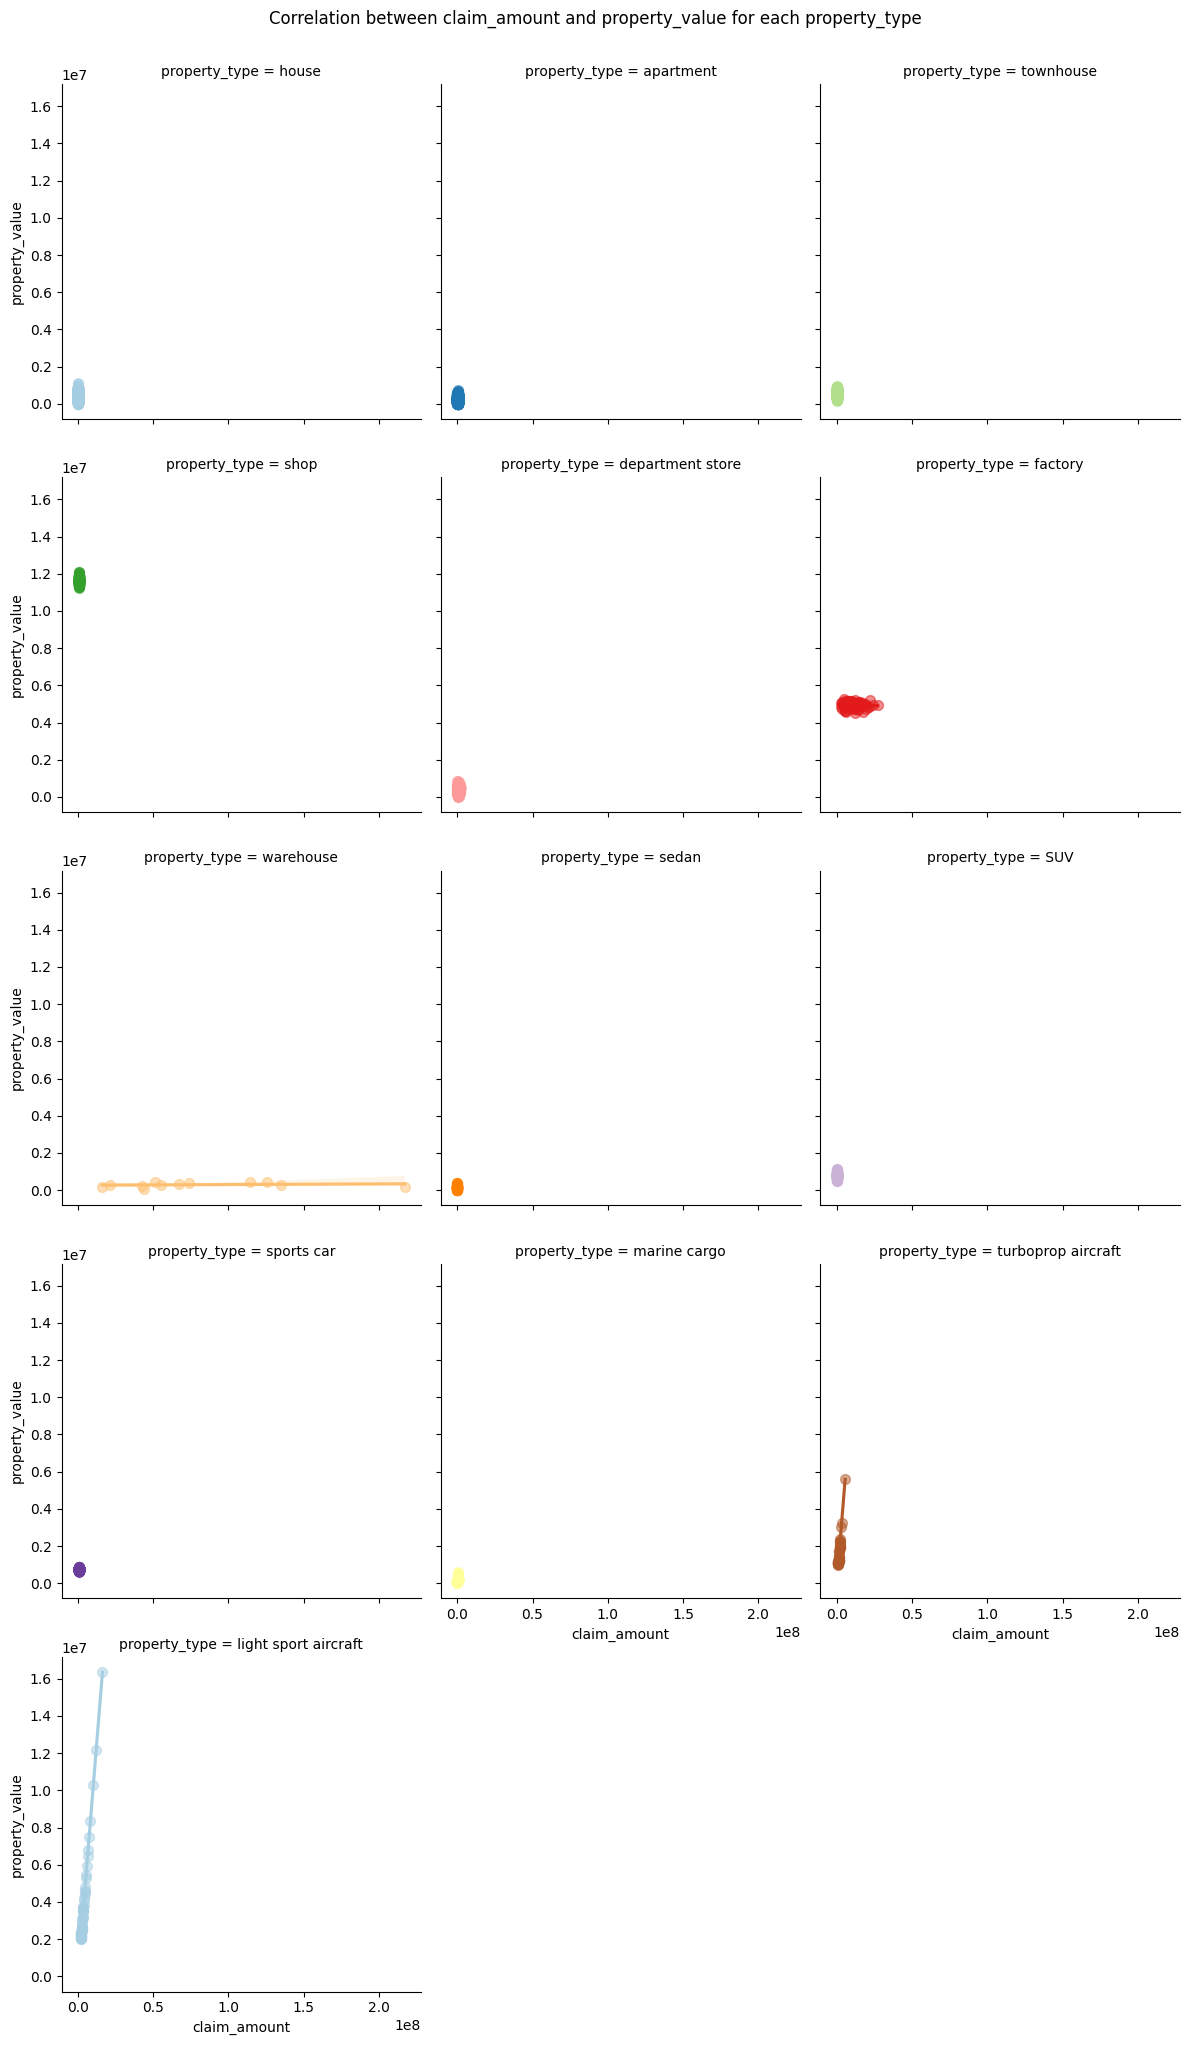

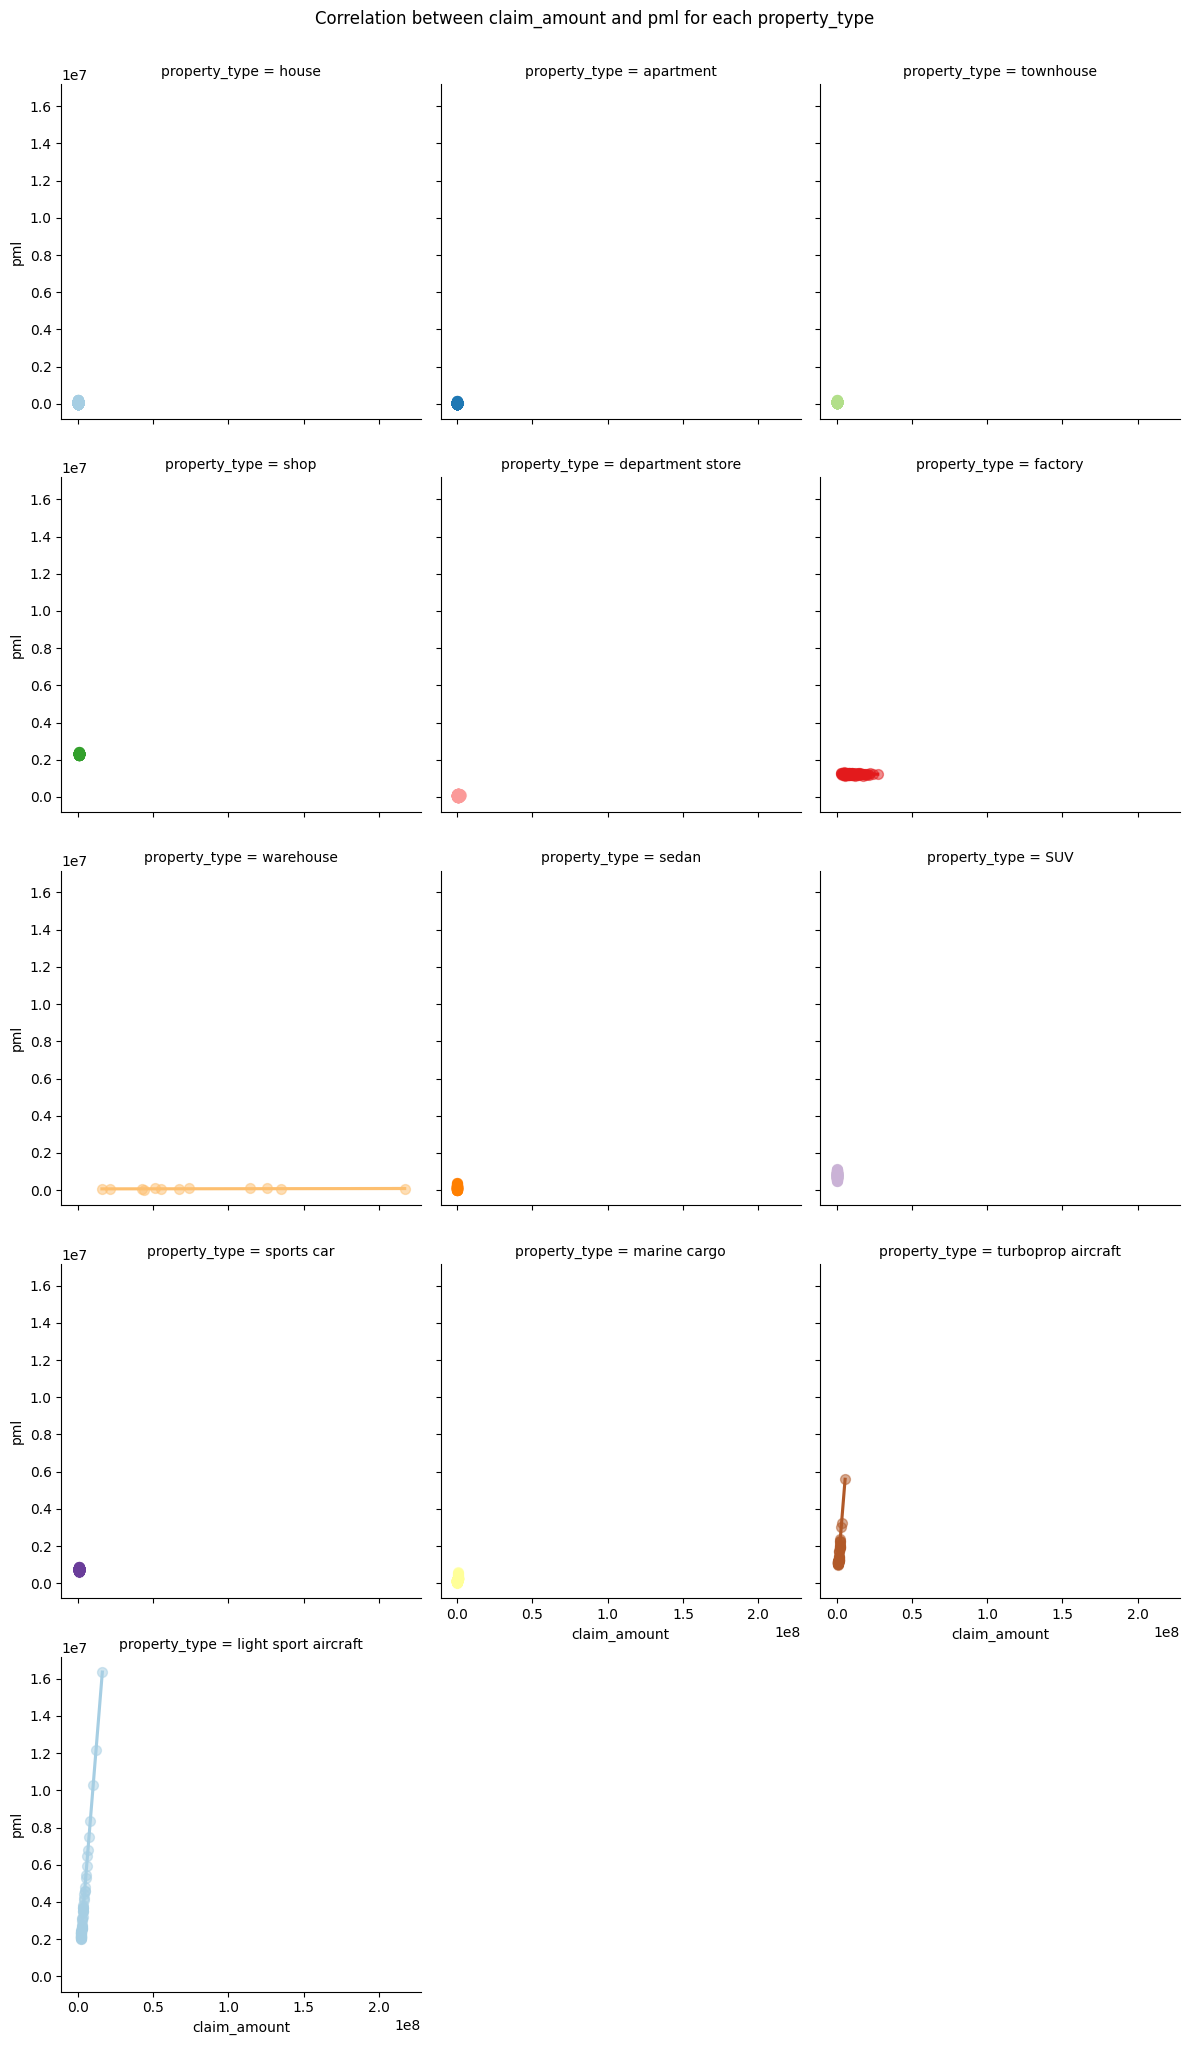

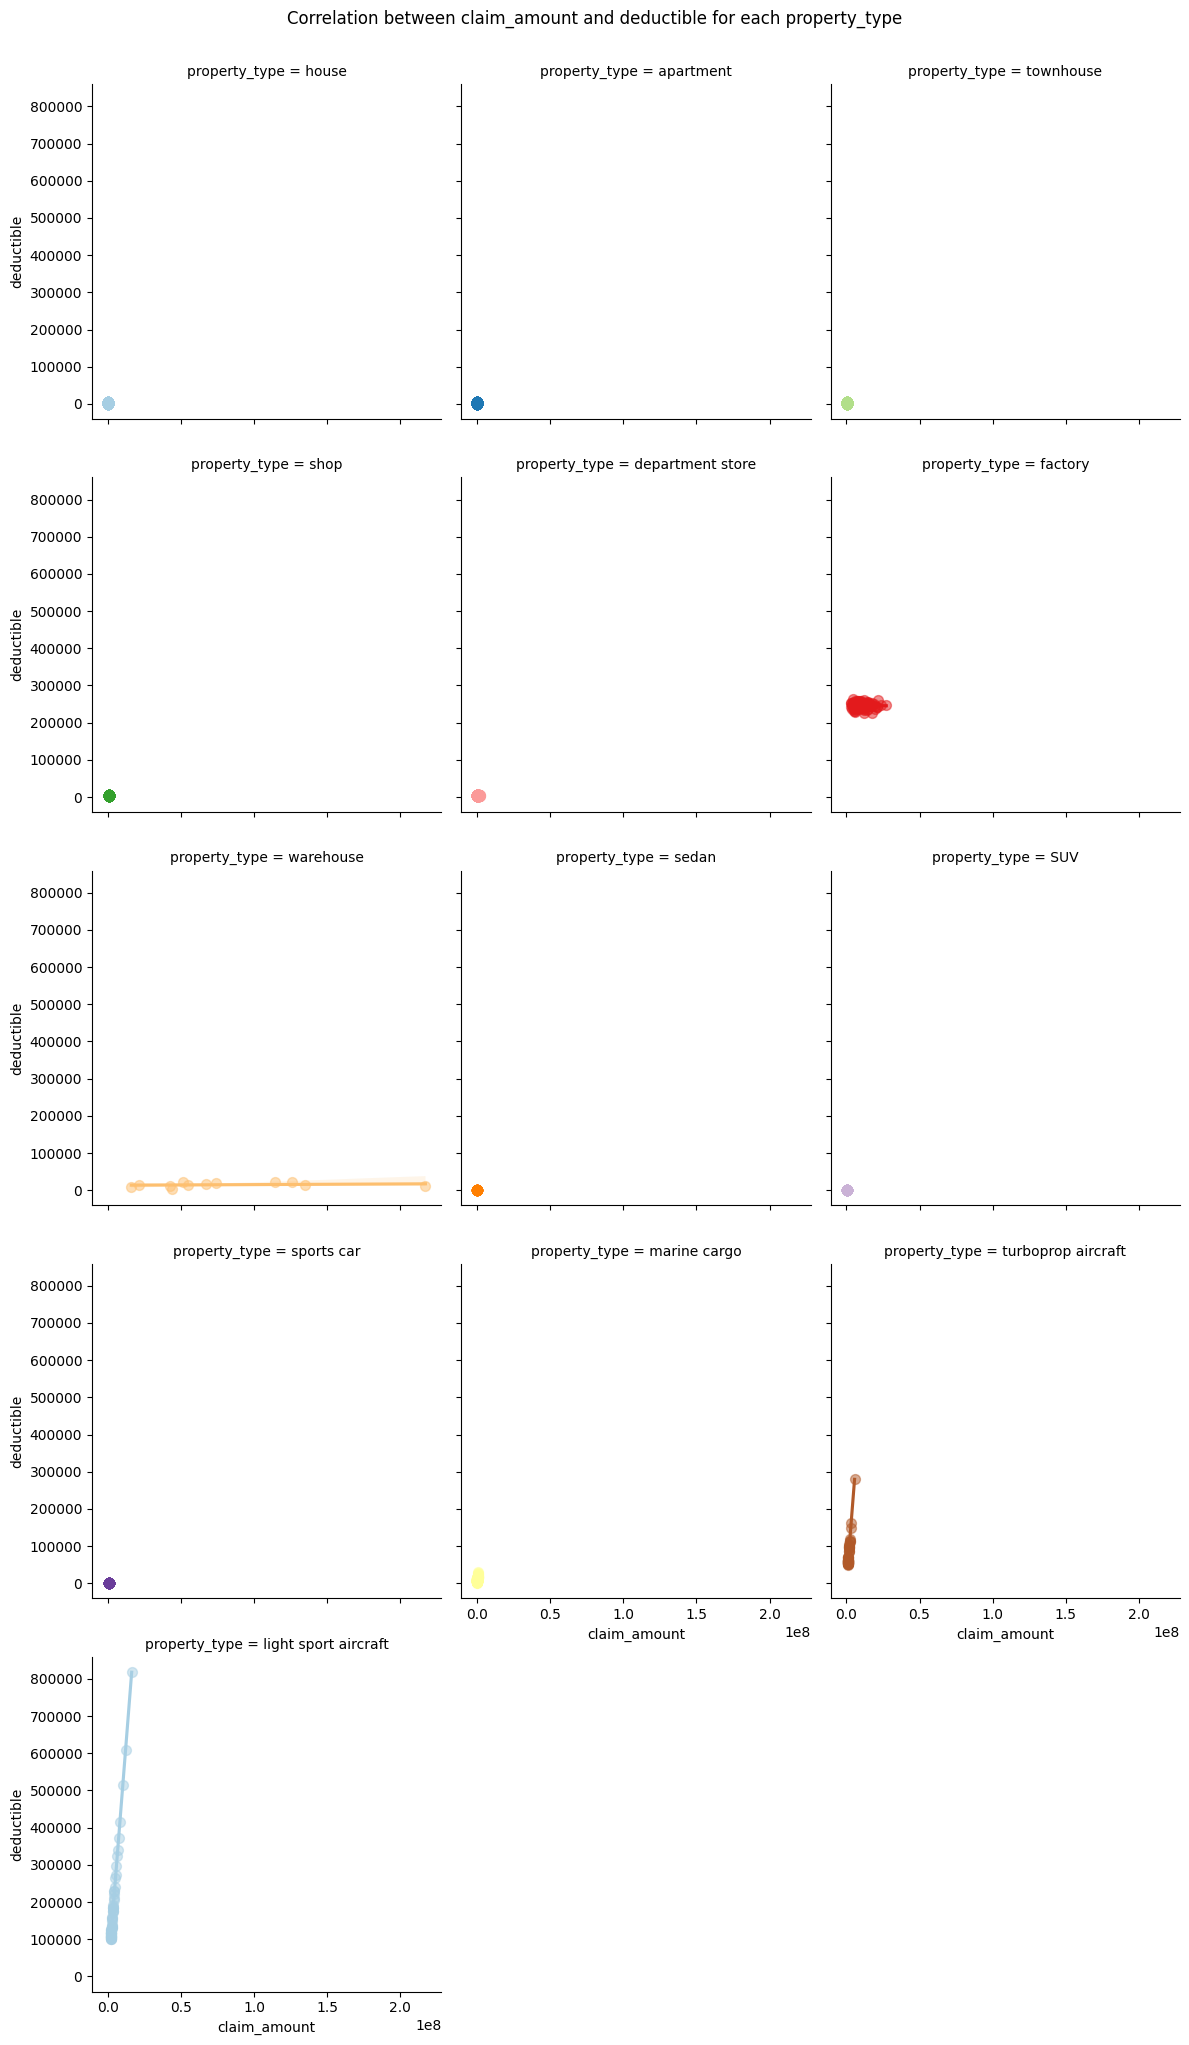

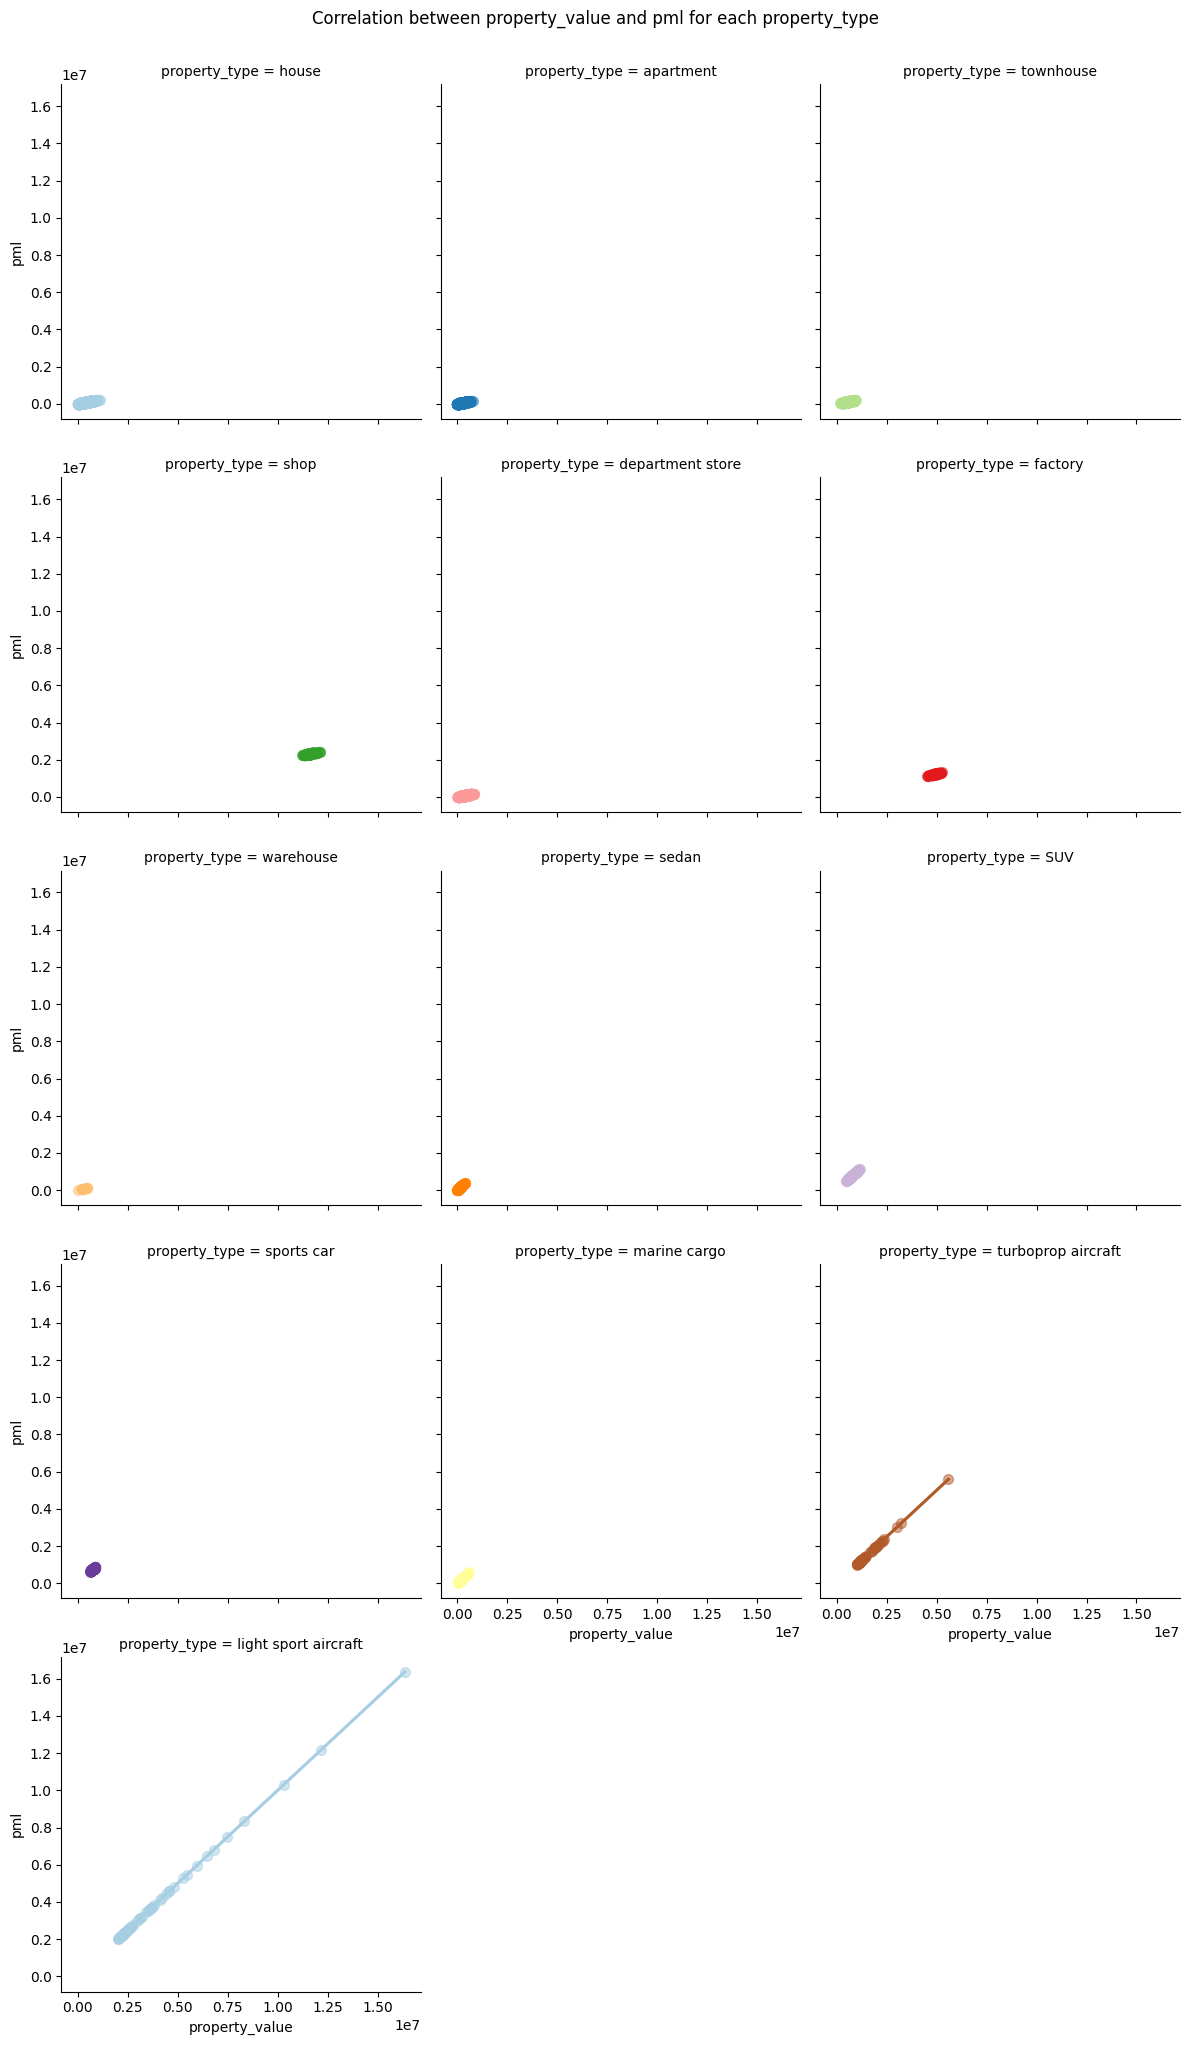

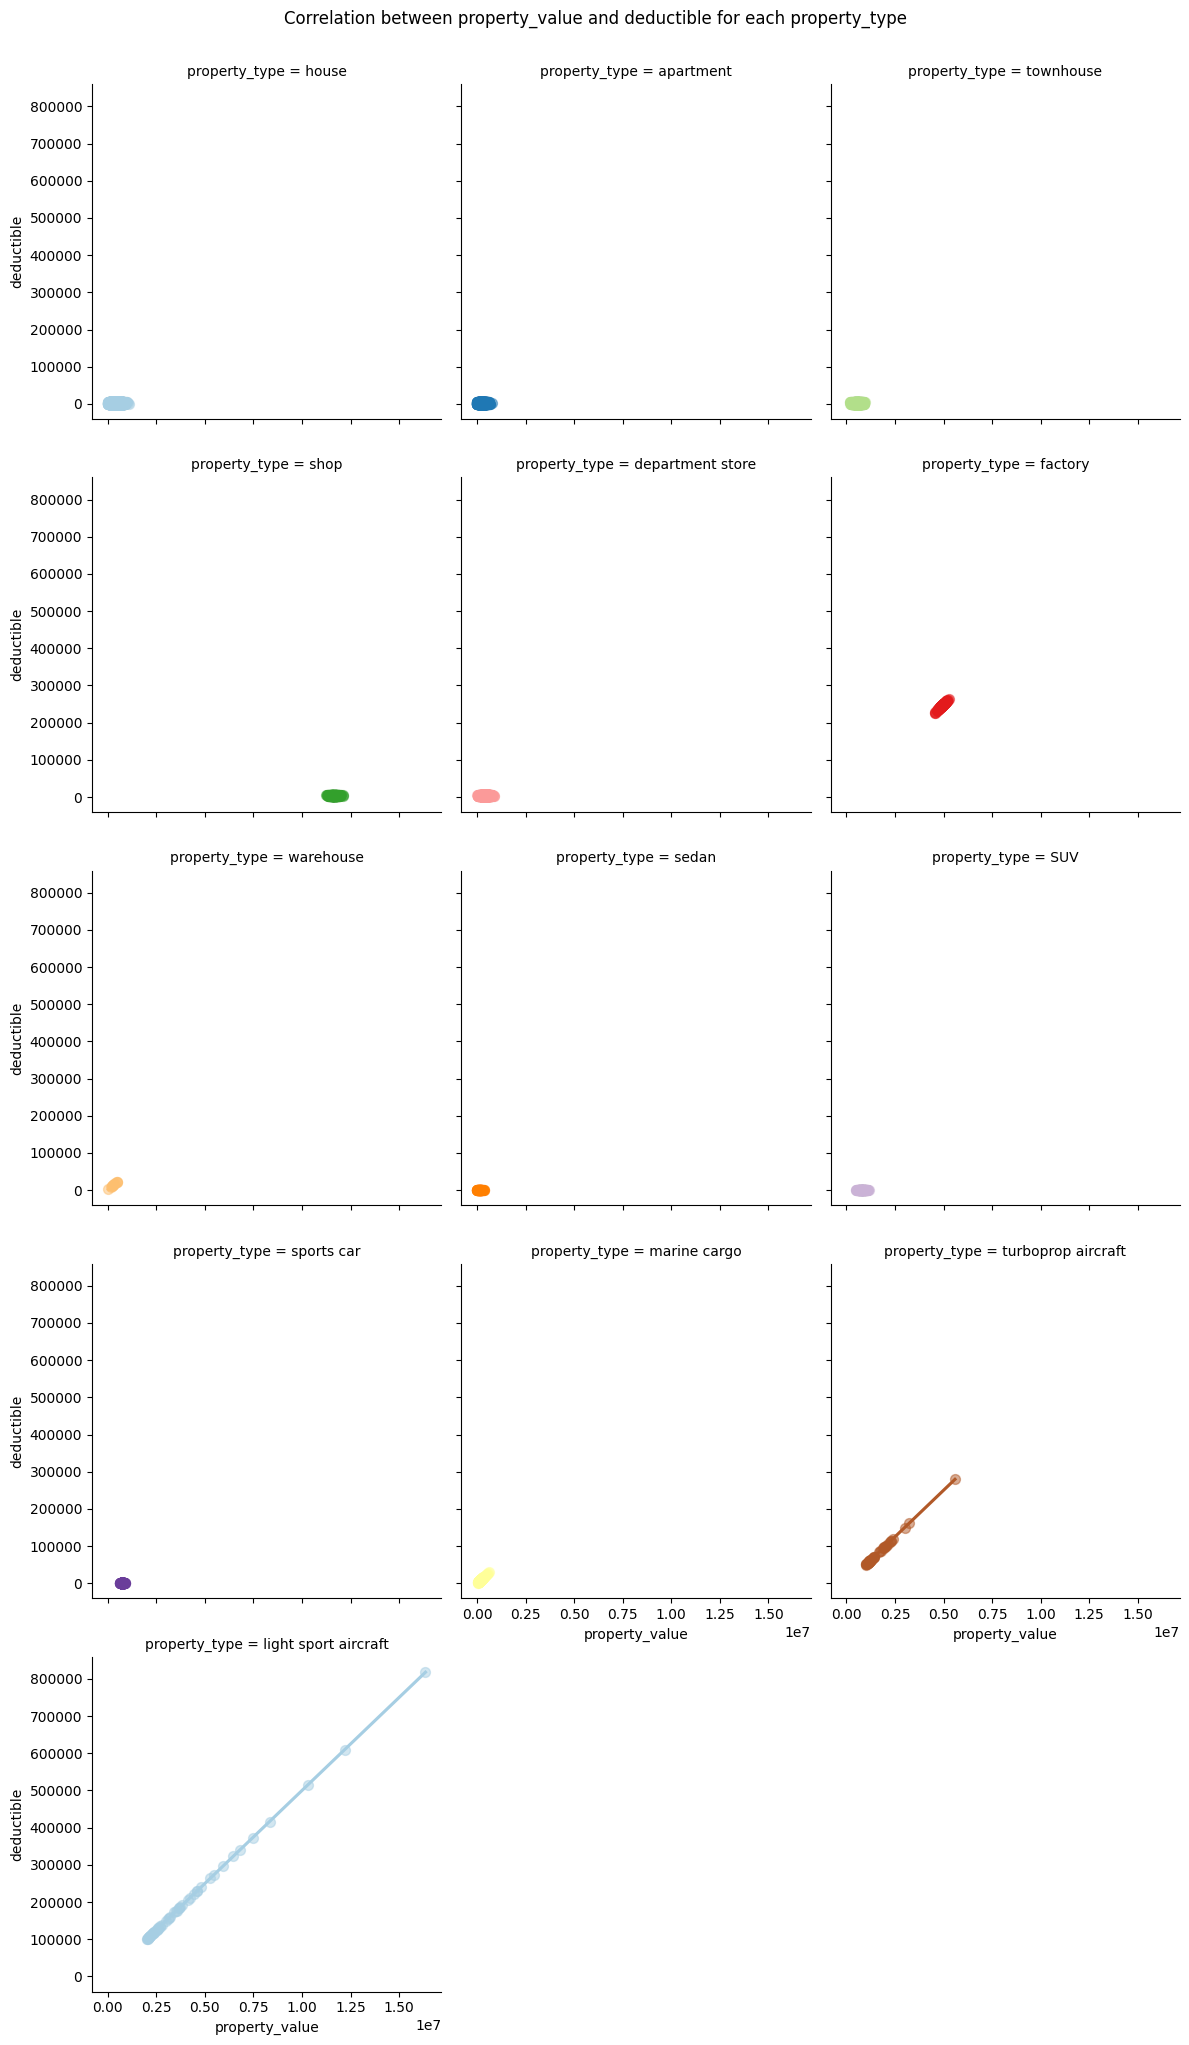

In [24]:
plot_correlation_for_classes(df_clean, "property_type", "claim_amount", "property_value")
plot_correlation_for_classes(df_clean, "property_type", "claim_amount", "pml")
plot_correlation_for_classes(df_clean, "property_type", "claim_amount", "deductible")
plot_correlation_for_classes(df_clean, "property_type", "property_value", "pml")
plot_correlation_for_classes(df_clean, "property_type", "property_value", "deductible")


In [25]:

def plot_timestamp_correlation_for_classes(data, timestamp_col, numeric_col, categorical_col):
    """
    Plot correlation visualization for a numeric column against a timestamp column for each class in a categorical column.
    """
    # Ensure that the timestamp column is in datetime format
    data[timestamp_col] = pd.to_datetime(data[timestamp_col])

    # Convert timestamp to numerical representation (Unix timestamp)
    data['timestamp_numeric'] = data[timestamp_col].apply(lambda x: x.timestamp())

    # Ensure that the categorical column is treated as a category
    data[categorical_col] = data[categorical_col].astype('category')

    # Create scatter plots with regression lines for each class
    g = sns.lmplot(
        data=data,
        x='timestamp_numeric',
        y=numeric_col,
        hue=categorical_col,
        col=categorical_col,
        col_wrap=3,
        height=4,
        aspect=1,
        palette="Paired",
        scatter_kws={'s': 50, 'alpha': 0.5}
    )
    g.set_axis_labels('incident_date')
    # Set the title for the entire figure
    g.fig.suptitle(f'Correlation between {numeric_col} and {timestamp_col} for each {categorical_col}', y=1.02)

    plt.show()


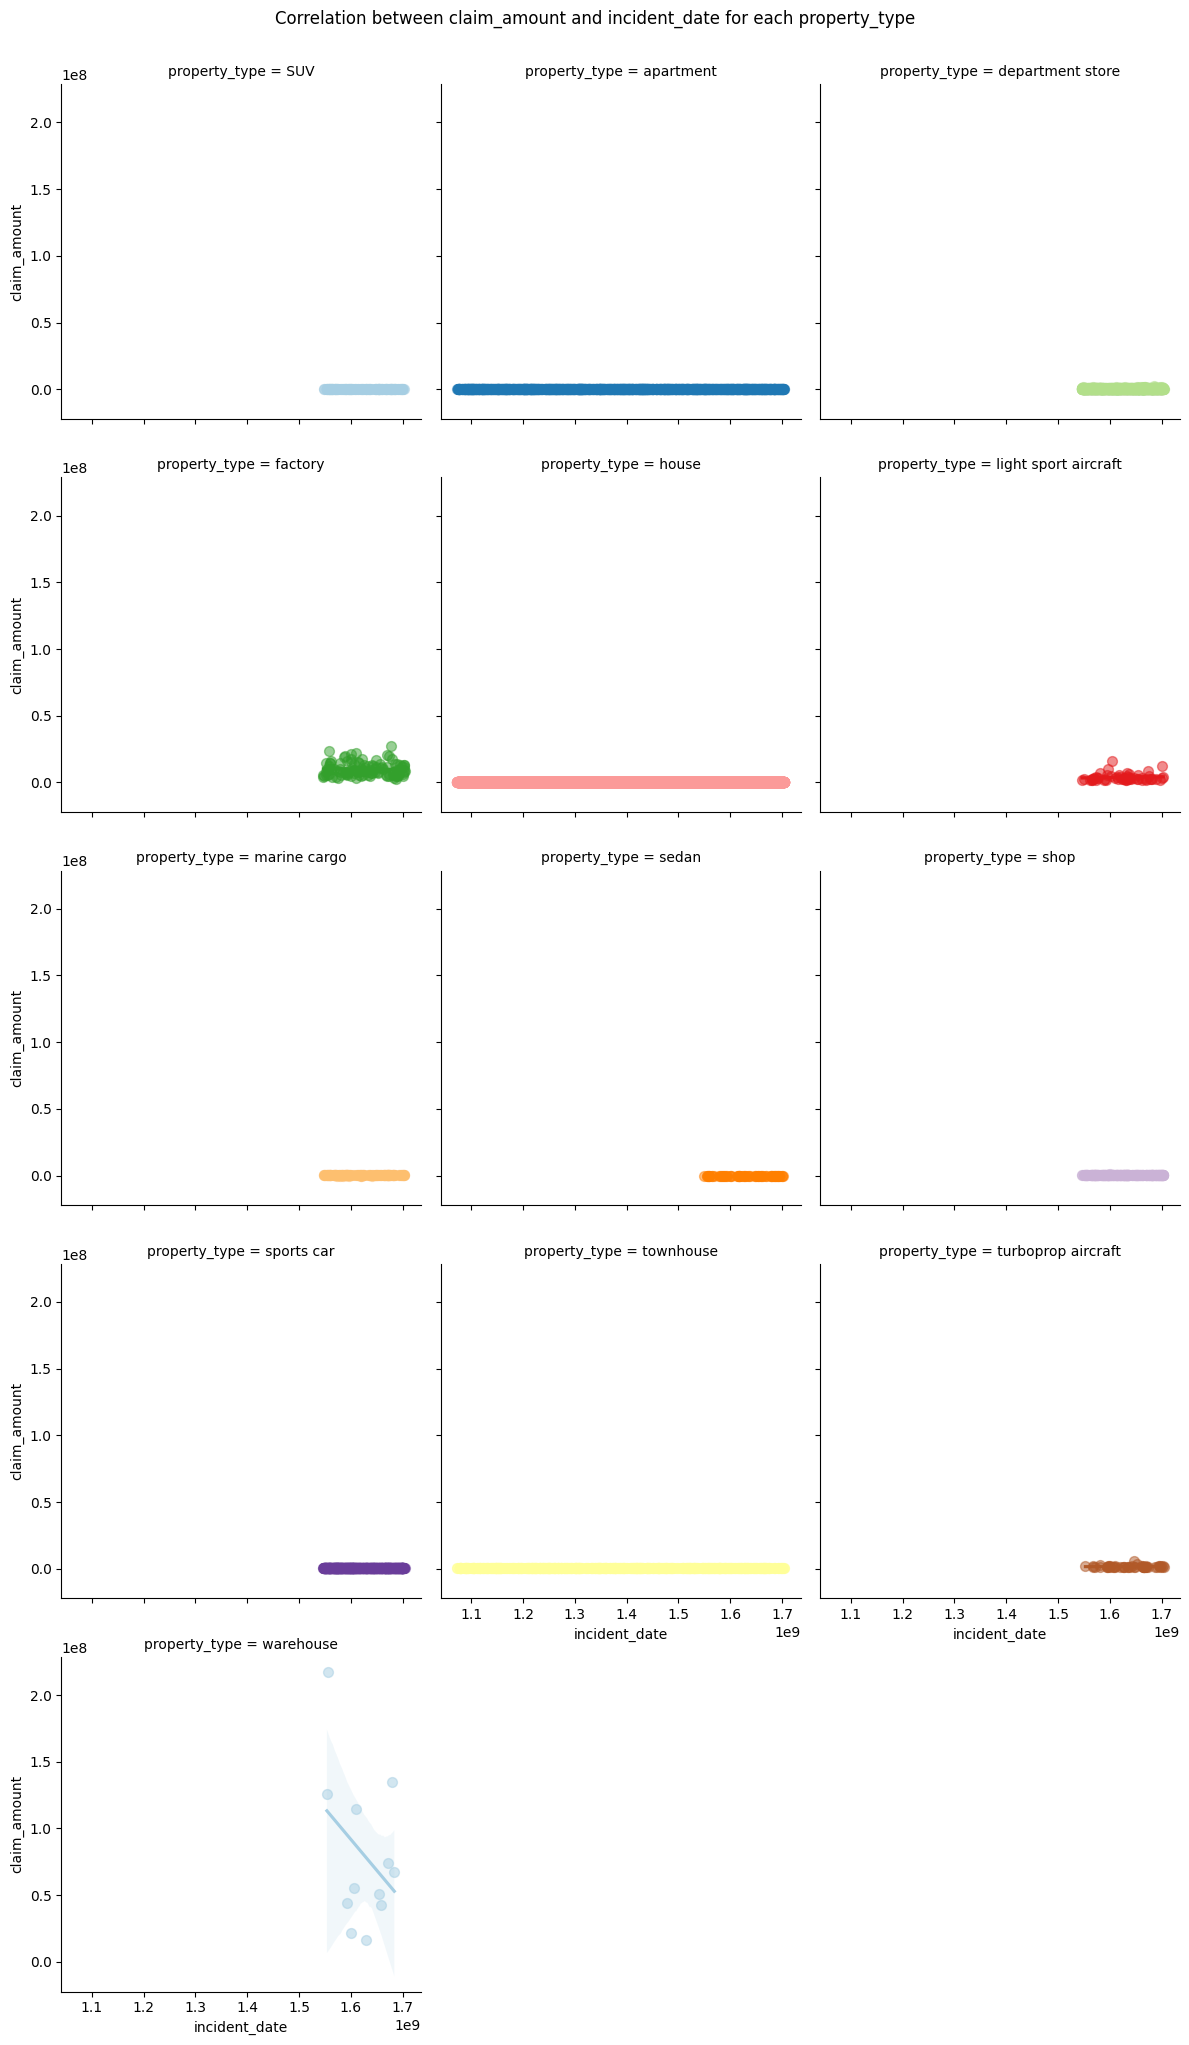

In [ ]:
plot_timestamp_correlation_for_classes(df_clean, "incident_date", "claim_amount", "property_type")

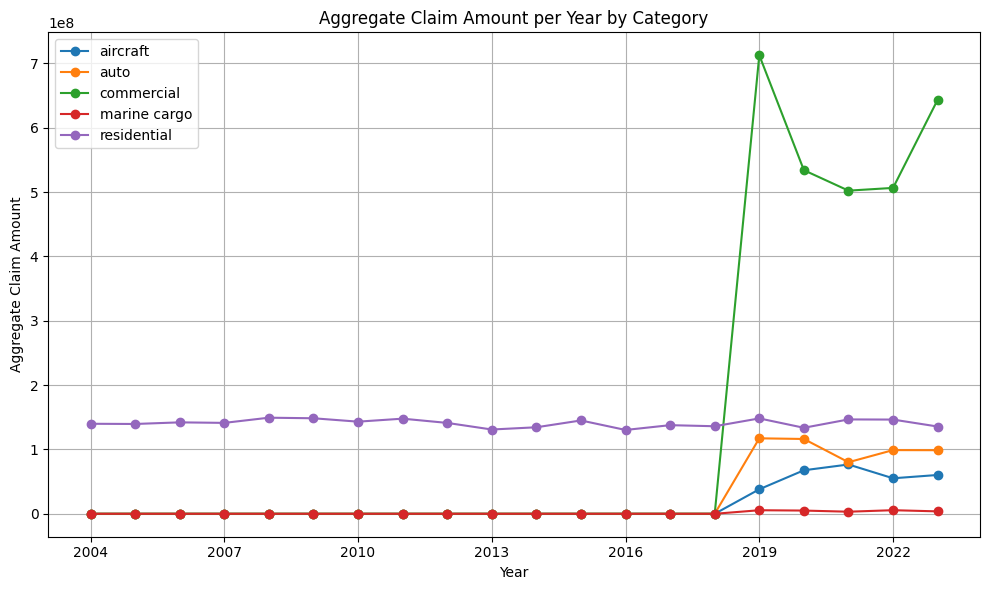

In [ ]:
grouped = df_clean.groupby([df_clean['incident_date'].dt.year, 'category'])['claim_amount'].sum().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each category as a separate line
for col in grouped.columns:
    ax.plot(grouped.index, grouped[col], marker='o', label=col)

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Aggregate Claim Amount')
ax.set_title('Aggregate Claim Amount per Year by Category')
ax.legend()
ax.grid(True)
plt.tight_layout()

# Ensure integer tick labels for years
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Display the plot
plt.show()